In [100]:
import kagglehub
import pandas as pd
import numpy as np


In [101]:
# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\basha\.cache\kagglehub\datasets\shree1992\housedata\versions\2


In [102]:
data = pd.read_csv(path + "/data.csv")
data.head(3)


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0        2.5         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0        2.0         1930     11947   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA

In [103]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [104]:
data.shape


(4600, 18)

In [105]:
data.describe().T

count           mean            std     min        25%  \
price          4600.0  551962.988473  563834.702547     0.0  322875.00   
bedrooms       4600.0       3.400870       0.908848     0.0       3.00   
bathrooms      4600.0       2.160815       0.783781     0.0       1.75   
sqft_living    4600.0    2139.346957     963.206916   370.0    1460.00   
sqft_lot       4600.0   14852.516087   35884.436145   638.0    5000.75   
floors         4600.0       1.512065       0.538288     1.0       1.00   
waterfront     4600.0       0.007174       0.084404     0.0       0.00   
view           4600.0       0.240652       0.778405     0.0       0.00   
condition      4600.0       3.451739       0.677230     1.0       3.00   
sqft_above     4600.0    1827.265435     862.168977   370.0    1190.00   
sqft_basement  4600.0     312.081522     464.137228     0.0       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.0    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.0       0.00   

                         50%        75%         max  
price          460943.461539  654962.50  26590000.0  
bedrooms            3.000000       4.00         9.0  
bathrooms           2.250000       2.50         8.0  
sqft_living      1980.000000    2620.00     13540.0  
sqft_lot         7683.000000   11001.25   1074218.0  
floors              1.500000       2.00         3.5  
waterfront          0.000000       0.00         1.0  
view                0.000000       0.00         4.0  
condition           3.000000       4.00         5.0  
sqft_above       1590.000000    2300.00      9410.0  
sqft_basement       0.000000     610.00      4820.0  
yr_built         1976.000000    1997.00      2014.0  
yr_renovated        0.000000    1999.00      2014.0

In [106]:
numericData = data.select_dtypes(include="number")
catorigalData = data.select_dtypes(exclude='number')
numericData.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0     0          3        1340              0      1955          2005  
1     4          5        3370            280      1921             0  
2     0          4        1930              0      1966             0  
3     0          4        1000           1000      1963             0  
4     0          4        1140            800      1976          1992

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
groupd = data.groupby('city')


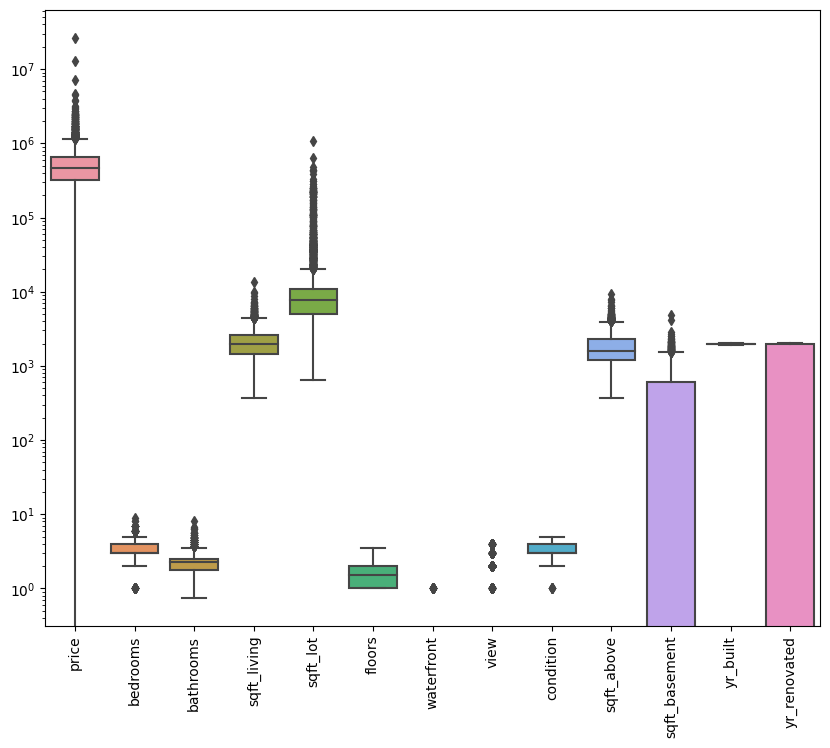

In [109]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=numericData)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [110]:
# Function to count outliers using IQR
def count_outliers_iqr(df):
    outlier_counts = {}
    
    for col in df.select_dtypes(include='number'):  # Only numerical columns
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    
    return outlier_counts

count_outliers_iqr(numericData)

{'price': 240,
 'bedrooms': 118,
 'bathrooms': 141,
 'sqft_living': 129,
 'sqft_lot': 541,
 'floors': 0,
 'waterfront': 33,
 'view': 460,
 'condition': 6,
 'sqft_above': 116,
 'sqft_basement': 82,
 'yr_built': 0,
 'yr_renovated': 0}

In [111]:
from scipy.stats import zscore

# Function to count outliers using Z-score
def count_outliers_zscore(df, threshold=3):
    outlier_counts = {}
    
    for col in df.select_dtypes(include='number'):
        z_scores = zscore(df[col])  # Compute Z-scores
        outliers = (abs(z_scores) > threshold).sum()  # Count values beyond threshold
        outlier_counts[col] = outliers
    
    return outlier_counts

# Count outliers using Z-score
outliers_zscore = count_outliers_zscore(numericData)
print(outliers_zscore)

{'price': 34, 'bedrooms': 19, 'bathrooms': 27, 'sqft_living': 50, 'sqft_lot': 78, 'floors': 2, 'waterfront': 33, 'view': 186, 'condition': 6, 'sqft_above': 53, 'sqft_basement': 46, 'yr_built': 0, 'yr_renovated': 0}


In [112]:
numericData = numericData.drop(["view", "waterfront"], axis=1)

In [113]:
numeric_df = numericData

# Calculate quartiles and IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = pd.DataFrame(columns=numeric_df.columns)

for col in numeric_df.columns:
    lower_outliers = numeric_df[col] < lower_bound[col]
    upper_outliers = numeric_df[col] > upper_bound[col]
    feature_outliers = numeric_df[(lower_outliers) | (upper_outliers)]
    outliers_df = pd.concat([outliers_df, feature_outliers])


print(outliers_df.duplicated().sum())
# Drop duplicates to get unique outlier samples
outliers_df = outliers_df.drop_duplicates()
print(outliers_df.duplicated().sum())

dfNoOutliers = numericData.copy()
# cappint outliers
for col in numeric_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    dfNoOutliers[col] = np.clip(dfNoOutliers[col], lower_bound, upper_bound)



462
0


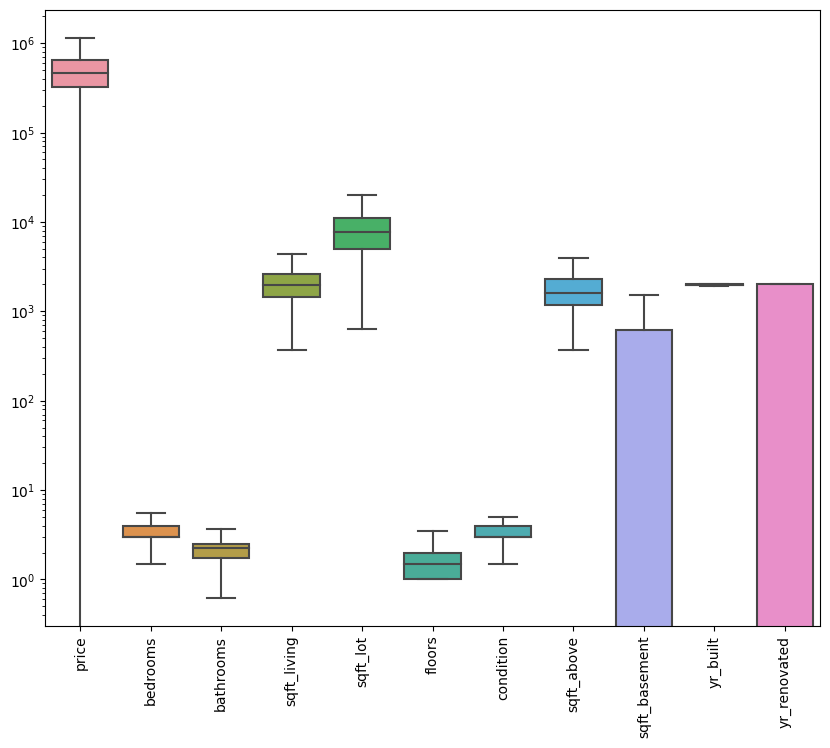

In [114]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=dfNoOutliers)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [115]:
numericData = dfNoOutliers

In [116]:
data = pd.concat([numericData, catorigalData], axis=1)
data


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     1.153094e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0           3.0        1340              0      1955          2005   
1           5.0        3370            280      1921             0   
2           4.0        1930              0      1966             0   
3           4.0        1000           1000      1963             0   
4           4.0        1140            800      1976          1992   
...         ...         ...            ...       ...           ...   
4595        4.0        1510              0      1954          1979   
4596        3.0        1460              0      1983          2009   
4597        3.0        3010              0      2009             0   
4598        3.0        1070           1020      1974             0   
4599        4.0        1490              0      1990             0   

                     date                    street       city  statezip  \
0     2014-05-02 00:00:00      18810 Densmore Ave N  Shoreline  WA 98133   
1     2014-05-02 00:00:00           709 W Blaine St    Seattle  WA 98119   
2     2014-05-02 00:00:00  26206-26214 143rd Ave SE       Kent  WA 98042   
3     2014-05-02 00:00:00           857 170th Pl NE   Bellevue  WA 98008   
4     2014-05-02 00:00:00         9105 170th Ave NE    Redmond  WA 98052   
...                   ...                       ...        ...       ...   
4595  2014-07-09 00:00:00            501 N 143rd St    Seattle  WA 98133   
4596  2014-07-09 00:00:00          14855 SE 10th Pl   Bellevue  WA 98007   
4597  2014-07-09 00:00:00          759 Ilwaco Pl NE     Renton  WA 98059   
4598  2014-07-10 00:00:00         5148 S Creston St    Seattle  WA 98178   
4599  2014-07-10 00:00:00         18717 SE 258th St  Covington  WA 98042   

     country  
0        USA  
1        USA  
2        USA  
3        USA  
4        USA  
...      ...  
4595     USA  
4596     USA  
4597     USA  
4598     USA  
4599     USA  

[4600 rows x 16 columns]

In [117]:
model = LinearRegression()

In [118]:
corr = numericData.corr()

In [119]:
numericData.describe().T

count           mean            std       min        25%  \
price          4600.0  516993.305241  261471.565541     0.000  322875.00   
bedrooms       4600.0       3.392609       0.856964     1.500       3.00   
bathrooms      4600.0       2.139158       0.720548     0.625       1.75   
sqft_living    4600.0    2114.626739     867.106902   370.000    1460.00   
sqft_lot       4600.0    8934.793261    5388.102126   638.000    5000.75   
floors         4600.0       1.512065       0.538288     1.000       1.00   
condition      4600.0       3.452391       0.675105     1.500       3.00   
sqft_above     4600.0    1810.417826     800.648273   370.000    1190.00   
sqft_basement  4600.0     305.431522     438.534107     0.000       0.00   
yr_built       4600.0    1970.786304      29.731848  1900.000    1951.00   
yr_renovated   4600.0     808.608261     979.414536     0.000       0.00   

                         50%        75%          max  
price          460943.461539  654962.50  1153093.750  
bedrooms            3.000000       4.00        5.500  
bathrooms           2.250000       2.50        3.625  
sqft_living      1980.000000    2620.00     4360.000  
sqft_lot         7683.000000   11001.25    20002.000  
floors              1.500000       2.00        3.500  
condition           3.000000       4.00        5.000  
sqft_above       1590.000000    2300.00     3965.000  
sqft_basement       0.000000     610.00     1525.000  
yr_built         1976.000000    1997.00     2014.000  
yr_renovated        0.000000    1999.00     2014.000

In [120]:
len(numericData.columns)

11

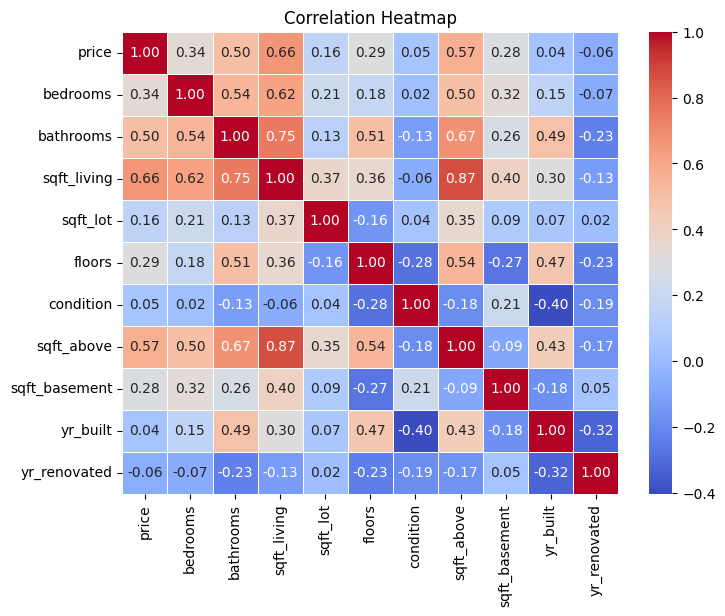

In [121]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
models = {}

for city, city_data in data.groupby('city'):
    if len(city_data) > 1:  # Check if the number of samples is greater than 1
        X = city_data[["sqft_living","bathrooms","sqft_lot"]]
        y = city_data[["price"]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        models[city] = model
        print(f"Model trained for {city}")
        
        plt.scatter(X_test['sqft_living'], y_test, color='blue', label="Actual Prices")
        plt.scatter(X_test['sqft_living'], y_pred, color='red', label="Predicted Prices")
        # plt.plot(X_test['sqft_living'], y_pred, color='blue')
        plt.xlabel("House Size (sq. meters)")
        plt.ylabel("House Price (in thousands)")
        plt.legend()
        plt.show()
    else:
        print(f"Not enough data to train model for {city}")
    

Not enough data to train model for Algona
Model trained for Auburn


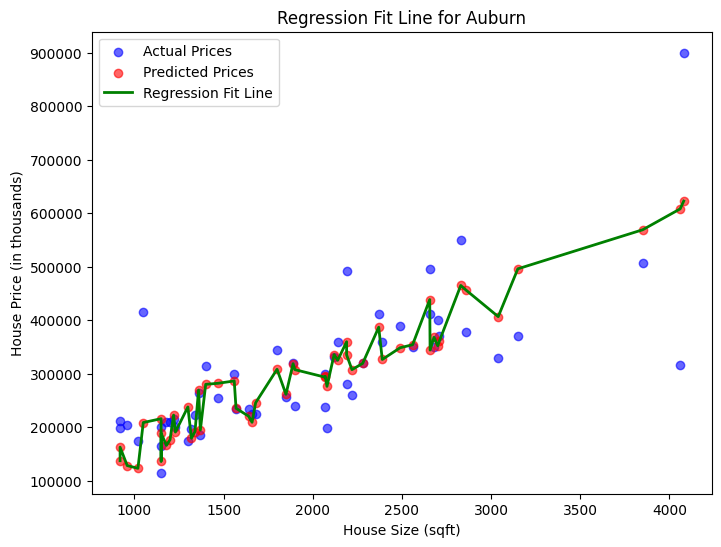

Not enough data to train model for Beaux Arts Village
Model trained for Bellevue


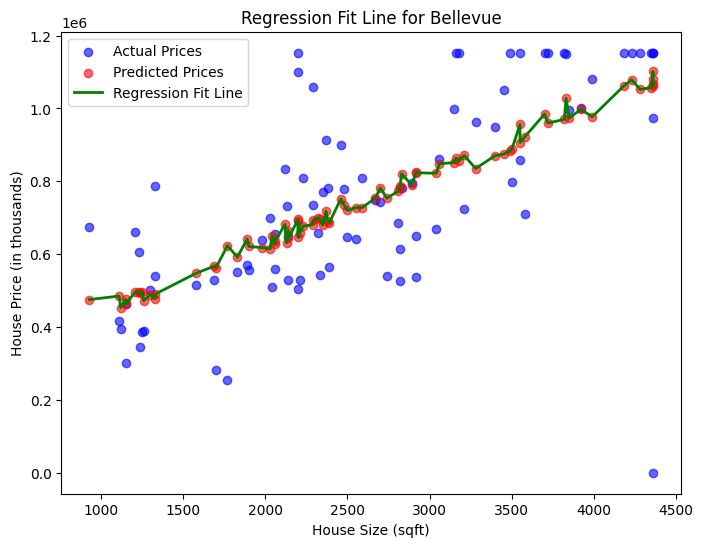

Not enough data to train model for Black Diamond
Model trained for Bothell


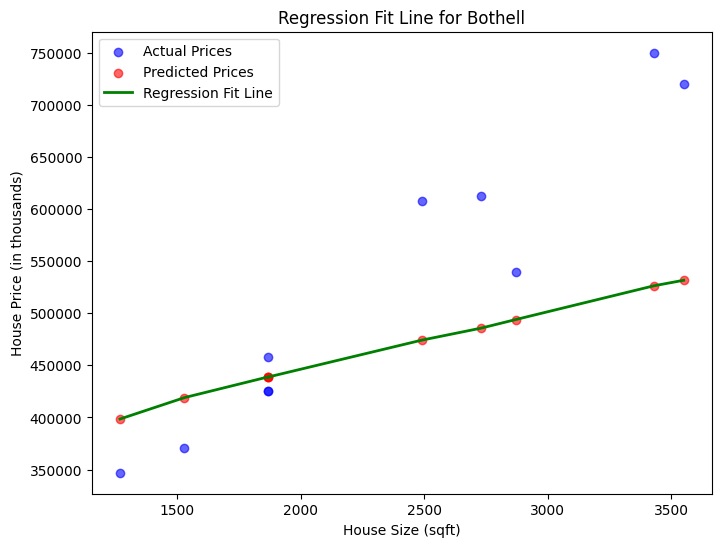

Model trained for Burien


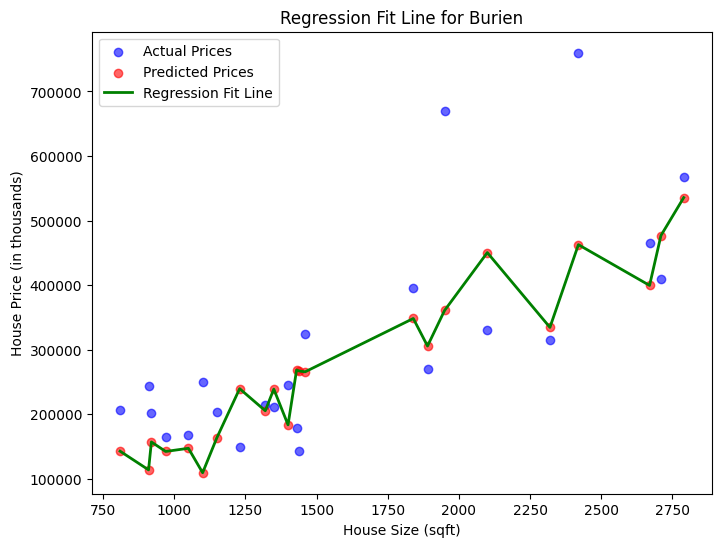

Model trained for Carnation


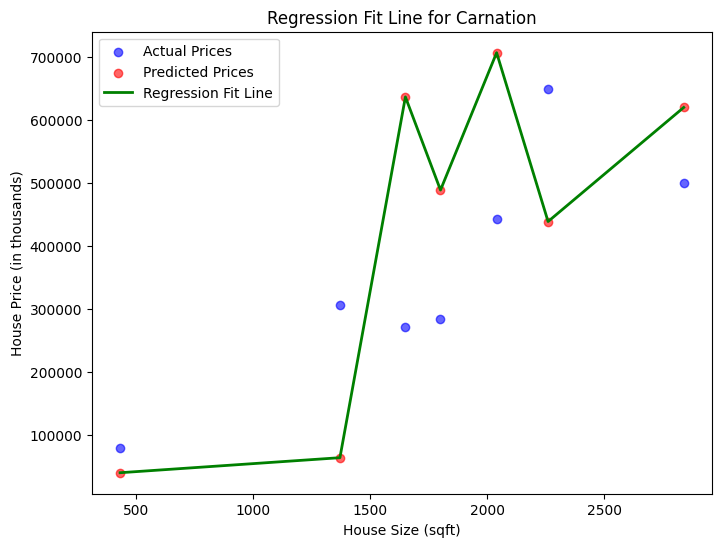

Not enough data to train model for Clyde Hill
Model trained for Covington


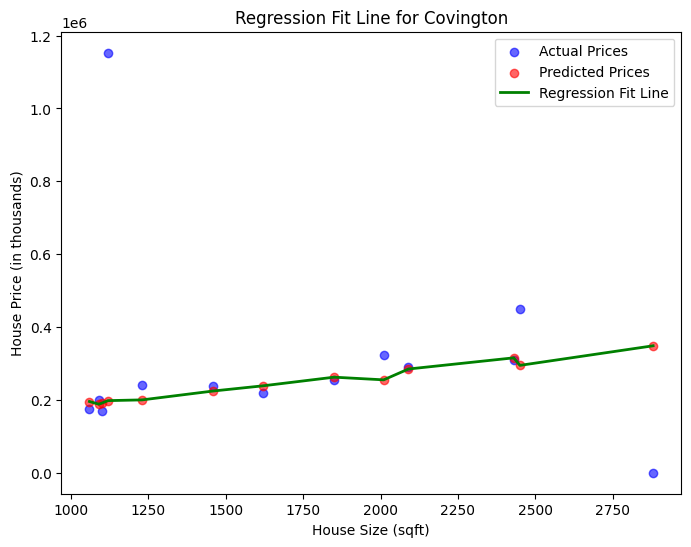

Model trained for Des Moines


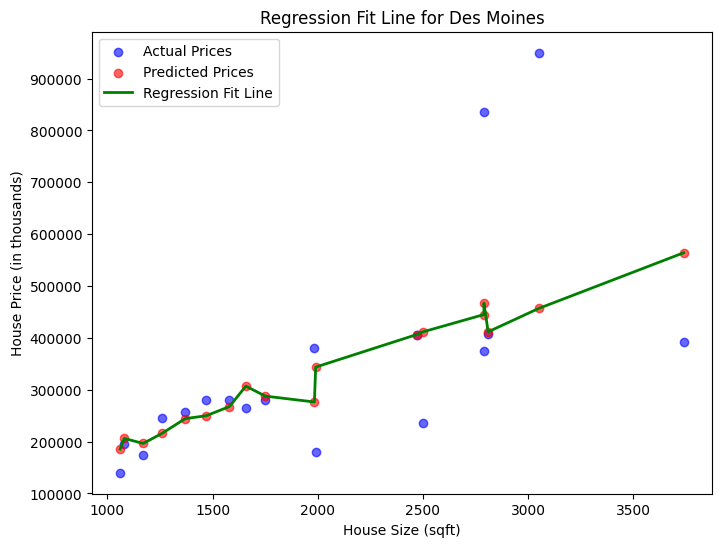

Model trained for Duvall


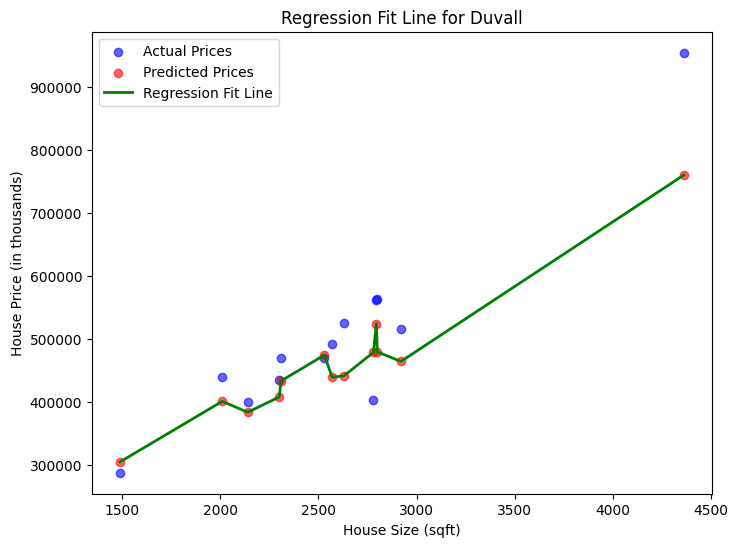

Model trained for Enumclaw


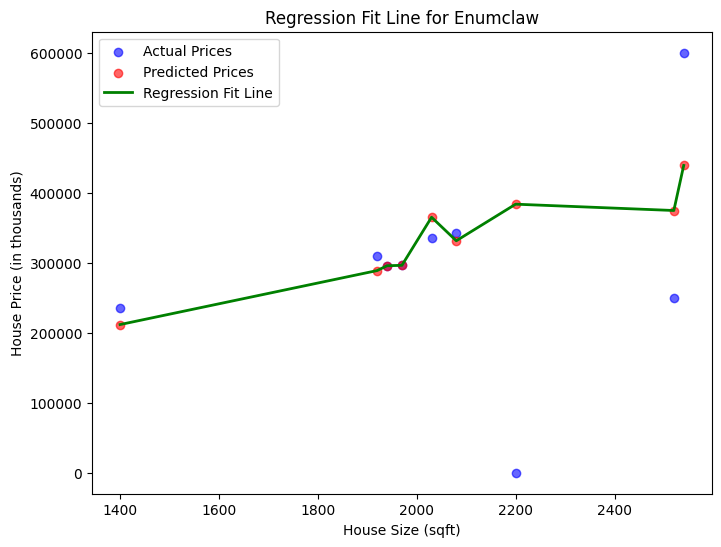

Not enough data to train model for Fall City
Model trained for Federal Way


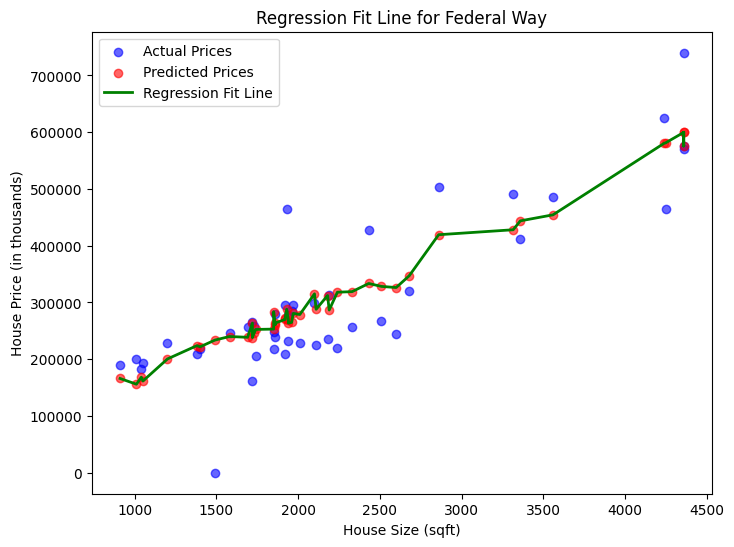

Not enough data to train model for Inglewood-Finn Hill
Model trained for Issaquah


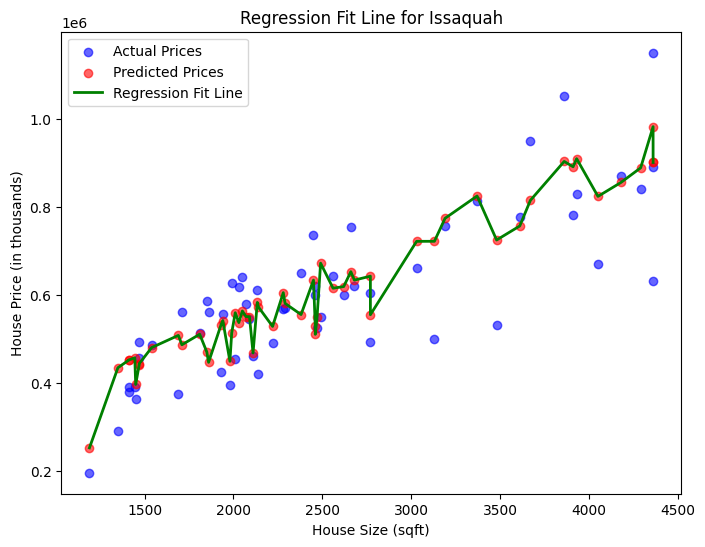

Model trained for Kenmore


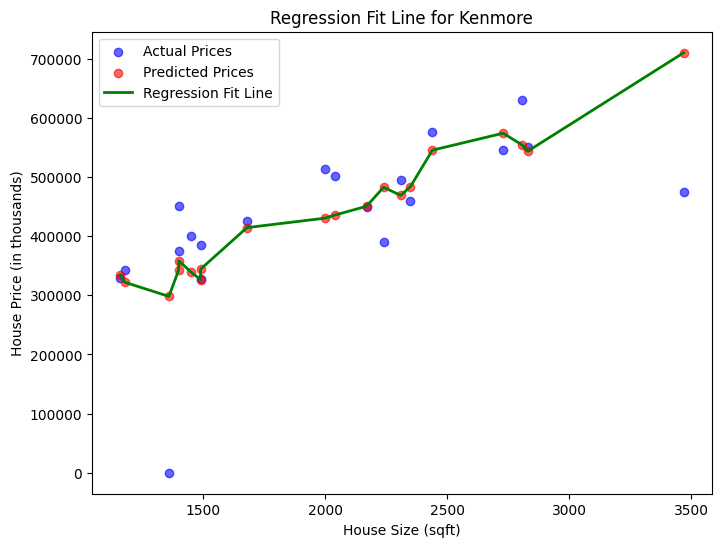

Model trained for Kent


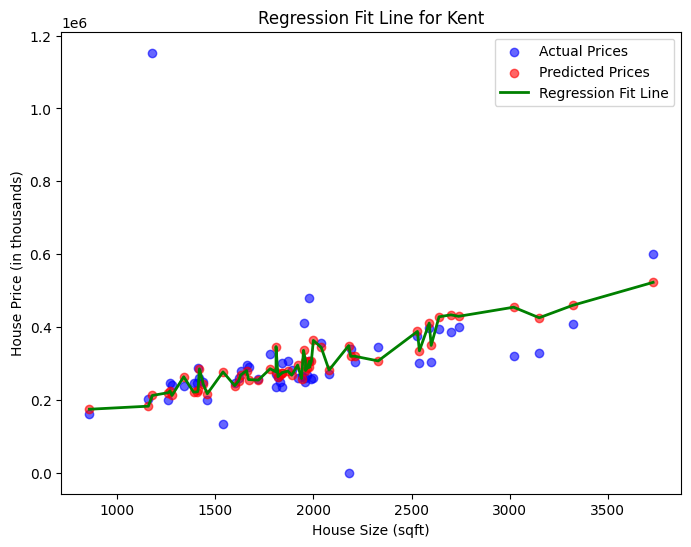

Model trained for Kirkland


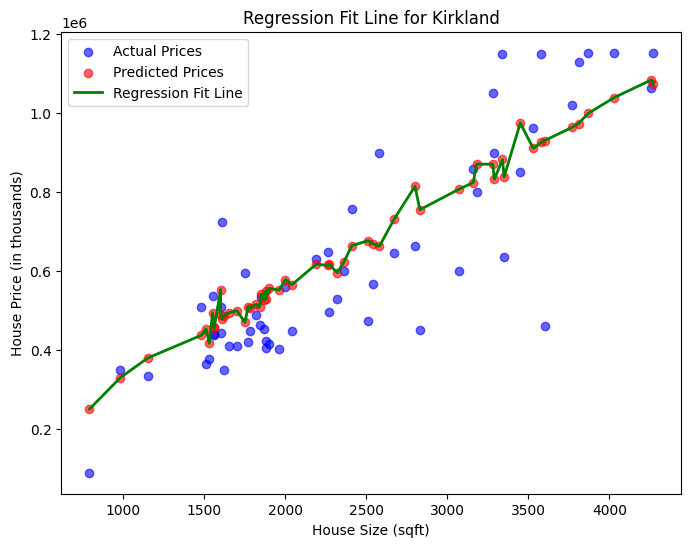

Model trained for Lake Forest Park


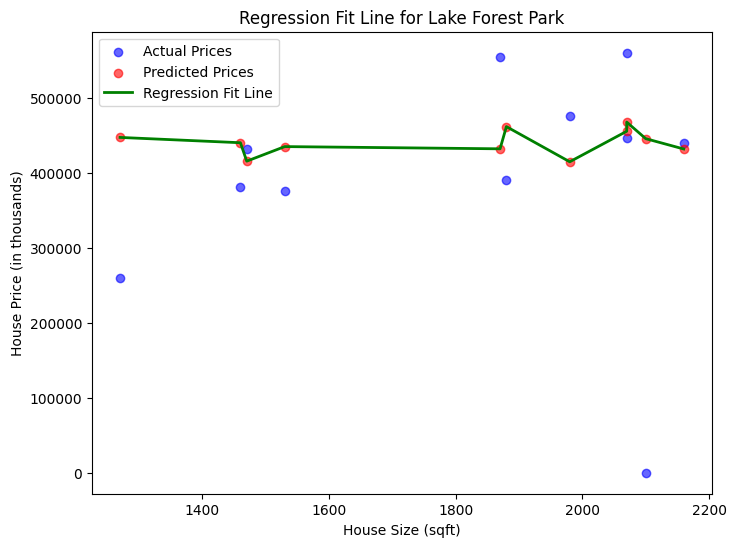

Model trained for Maple Valley


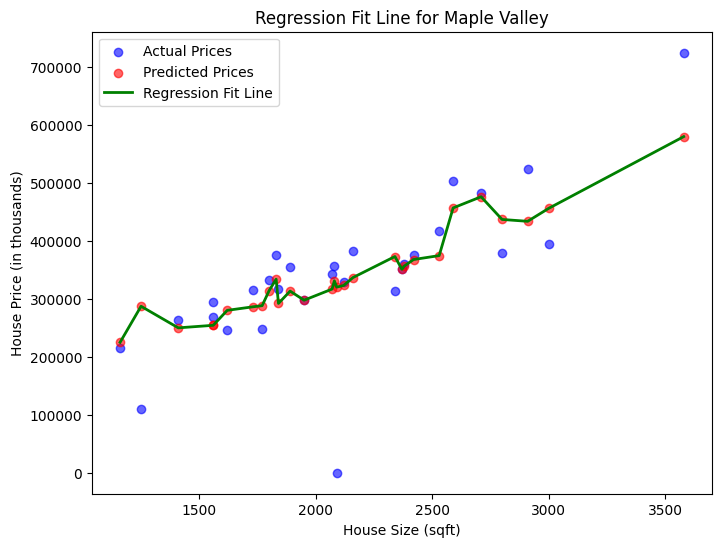

Not enough data to train model for Medina
Model trained for Mercer Island


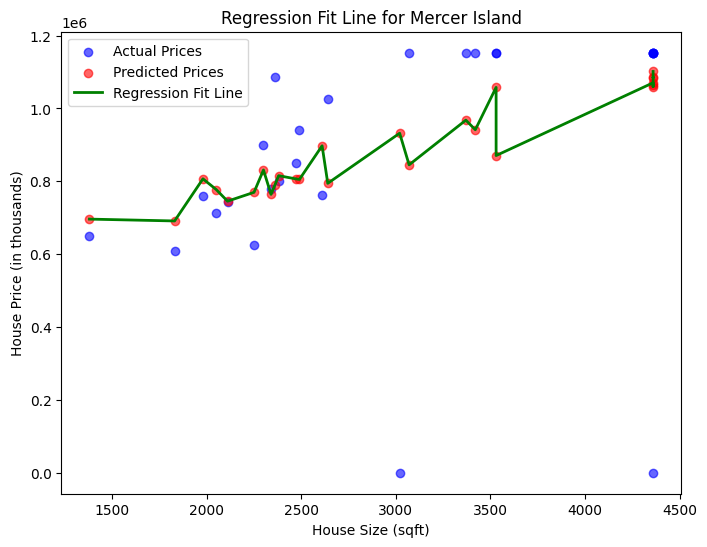

Not enough data to train model for Milton
Model trained for Newcastle


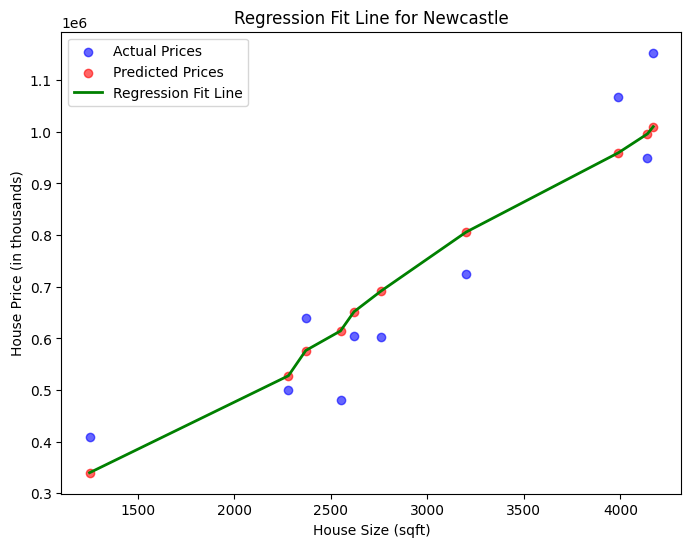

Not enough data to train model for Normandy Park
Model trained for North Bend


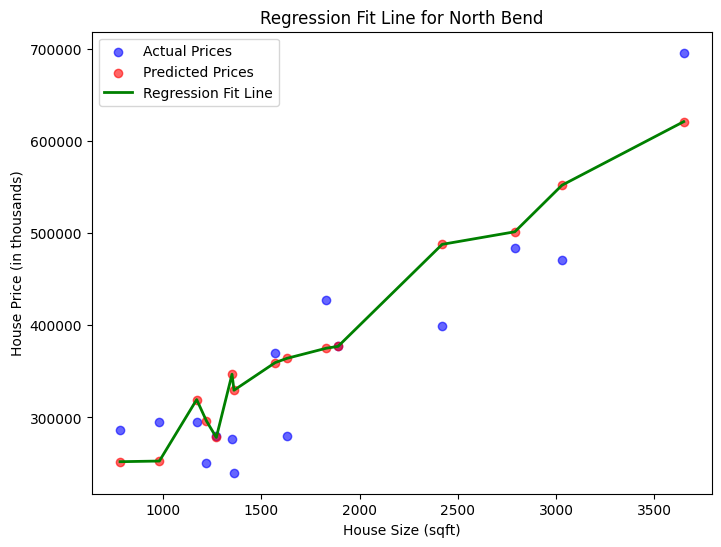

Not enough data to train model for Pacific
Not enough data to train model for Preston
Not enough data to train model for Ravensdale
Model trained for Redmond


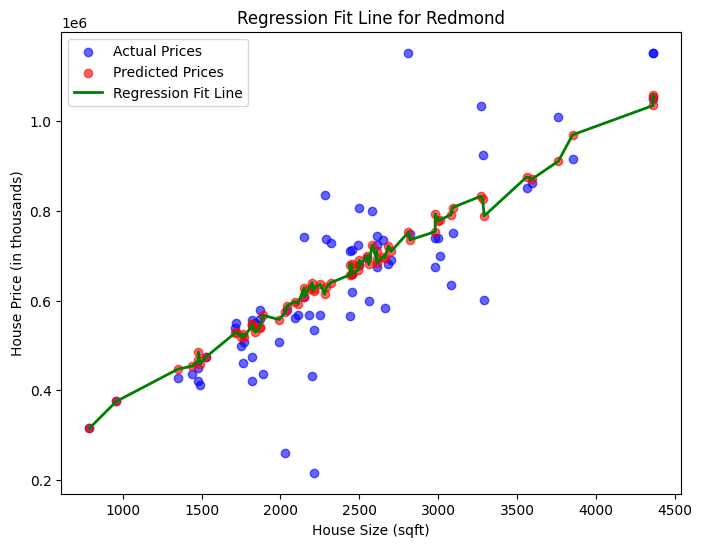

Model trained for Renton


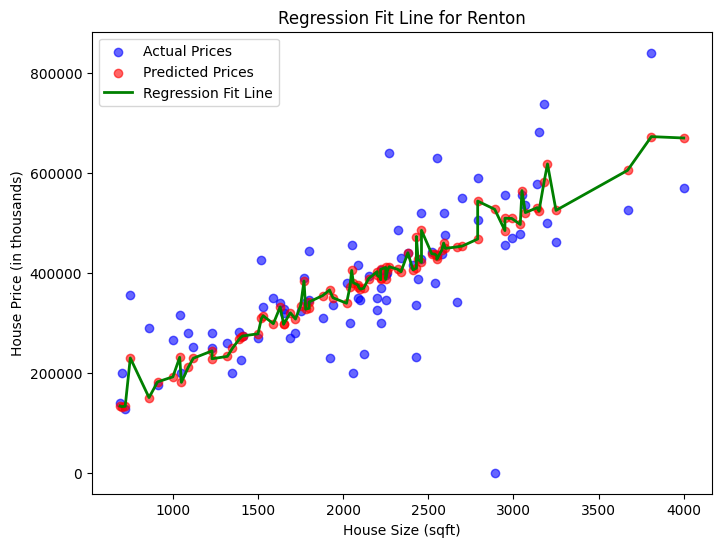

Model trained for Sammamish


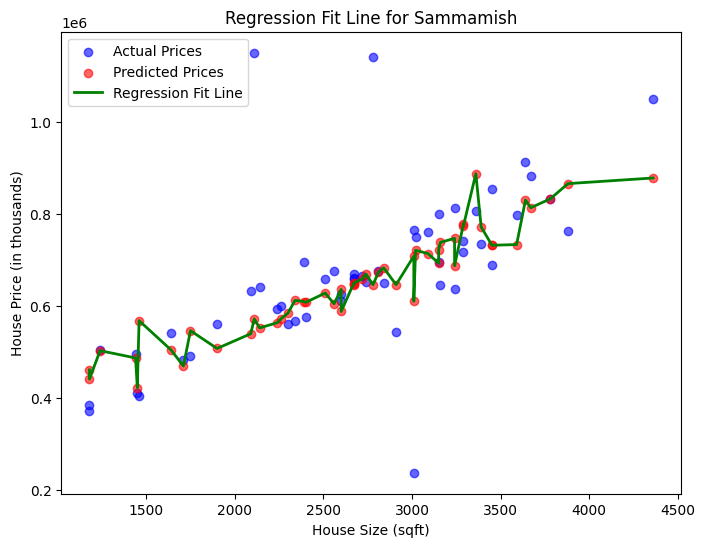

Model trained for SeaTac


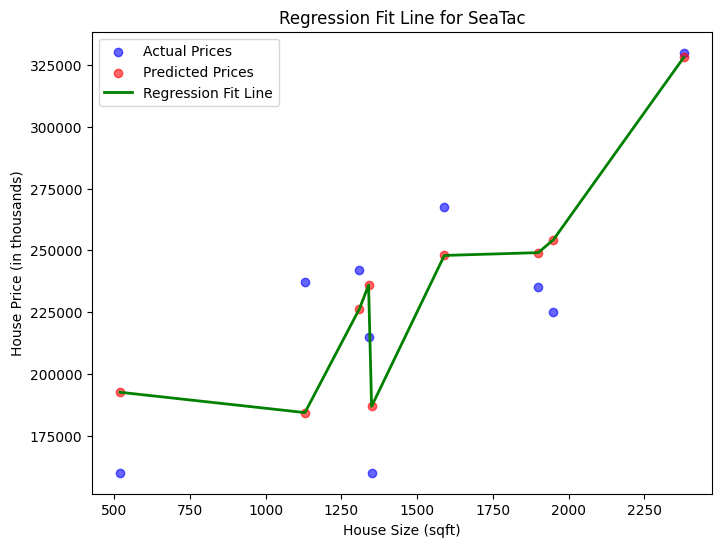

Model trained for Seattle


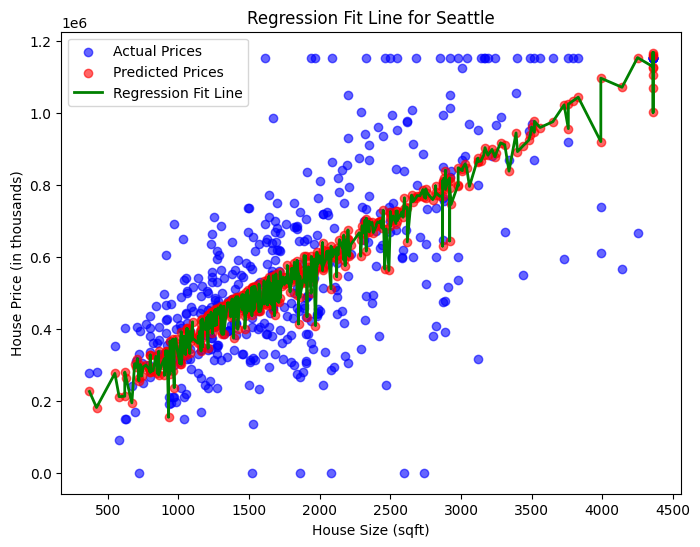

Model trained for Shoreline


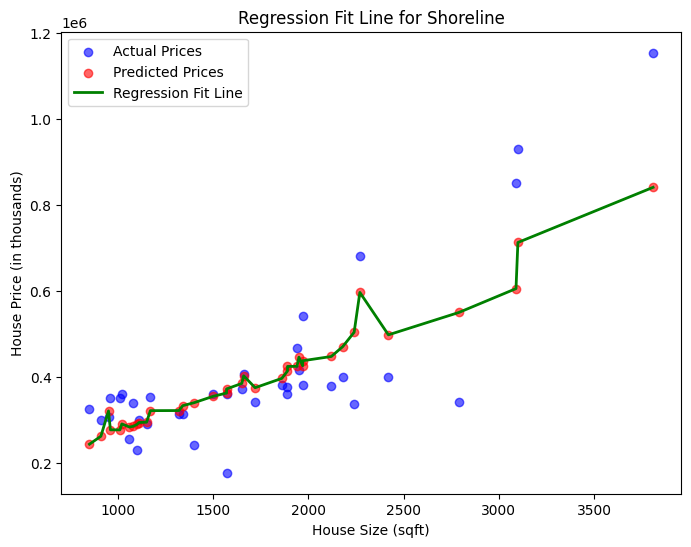

Not enough data to train model for Skykomish
Model trained for Snoqualmie


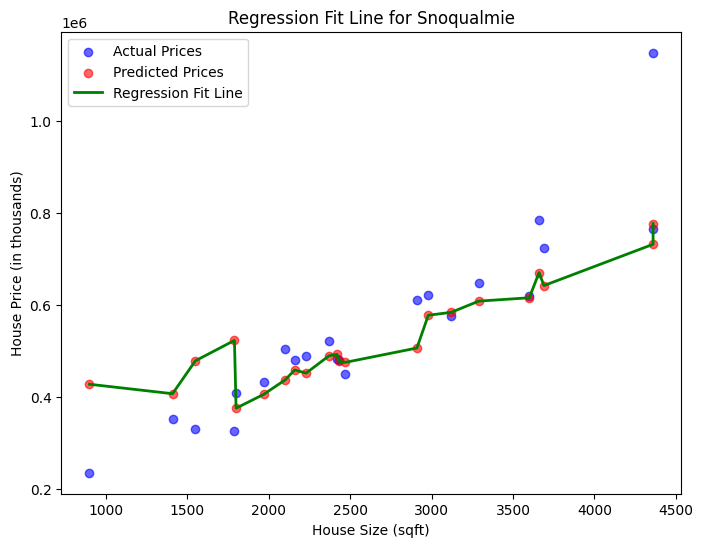

Not enough data to train model for Snoqualmie Pass
Model trained for Tukwila


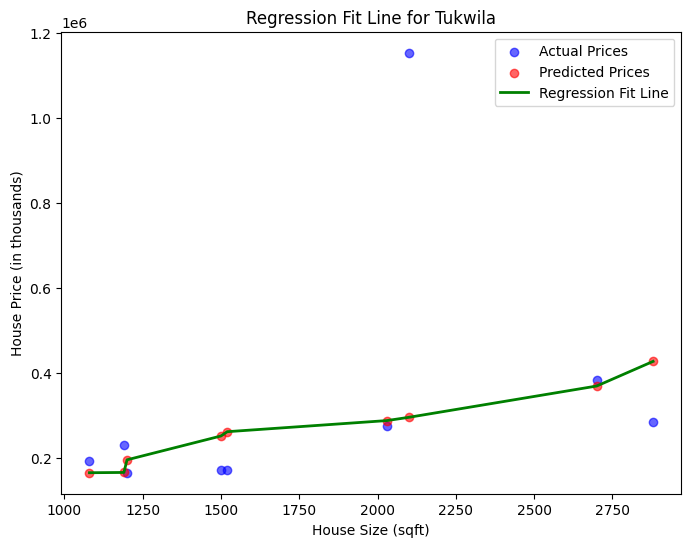

Model trained for Vashon


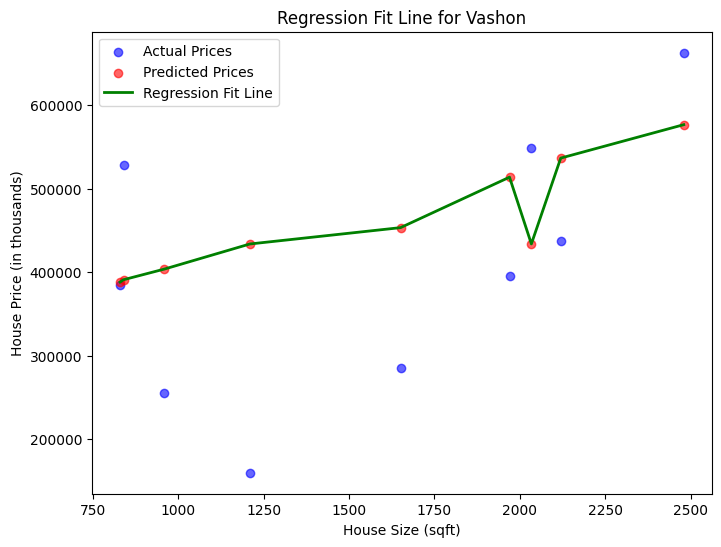

Model trained for Woodinville


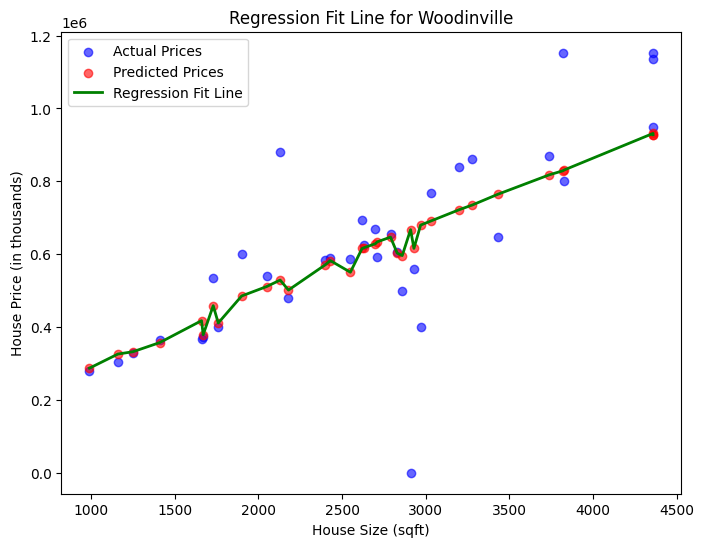

Not enough data to train model for Yarrow Point


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

models = {}

for city, city_data in data.groupby('city'):
    if len(city_data) > 20:  # Check if there are enough samples
        X = city_data[["sqft_living", "bathrooms", "sqft_lot"]]
        y = city_data["price"]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        models[city] = model
        print(f"Model trained for {city}")

        # Convert y_pred to Pandas Series for indexing alignment
        y_pred_series = pd.Series(y_pred, index=y_test.index)

        # Sorting for visualization
        sorted_indices = np.argsort(X_test["sqft_living"])
        X_sorted = X_test["sqft_living"].iloc[sorted_indices]
        y_pred_sorted = y_pred_series.iloc[sorted_indices]

        # Scatter plot: Actual vs Predicted Prices
        plt.figure(figsize=(8, 6))
        plt.scatter(X_test["sqft_living"], y_test, color='blue', label="Actual Prices", alpha=0.6)
        plt.scatter(X_test["sqft_living"], y_pred_series, color='red', label="Predicted Prices", alpha=0.6)

        # Regression Fit Line
        plt.plot(X_sorted, y_pred_sorted, color='green', label="Regression Fit Line", linewidth=2)

        # Labels and title
        plt.xlabel("House Size (sqft)")
        plt.ylabel("House Price (in thousands)")
        plt.title(f"Regression Fit Line for {city}")
        plt.legend()
        plt.show()
    else:
        print(f"Not enough data to train model for {city}")


Not enough data to train model for Algona
Model trained for Auburn


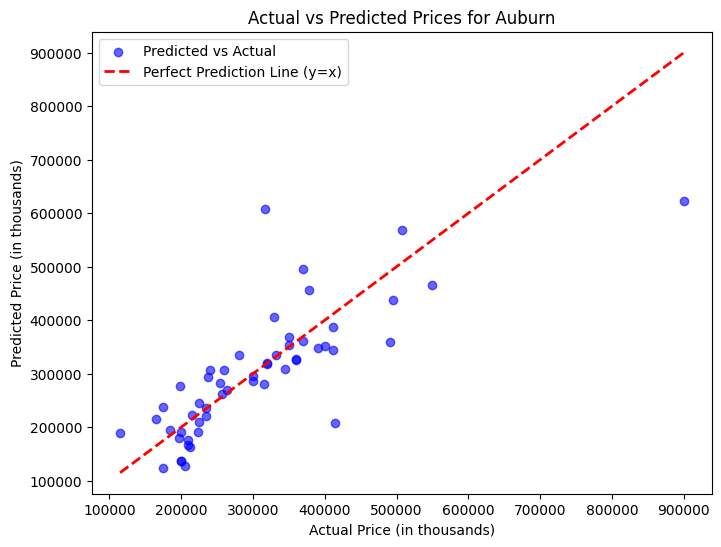

Not enough data to train model for Beaux Arts Village
Model trained for Bellevue


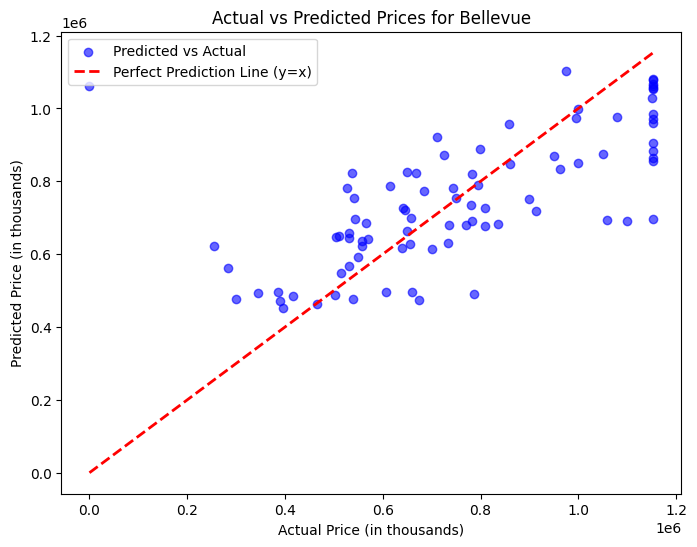

Not enough data to train model for Black Diamond
Model trained for Bothell


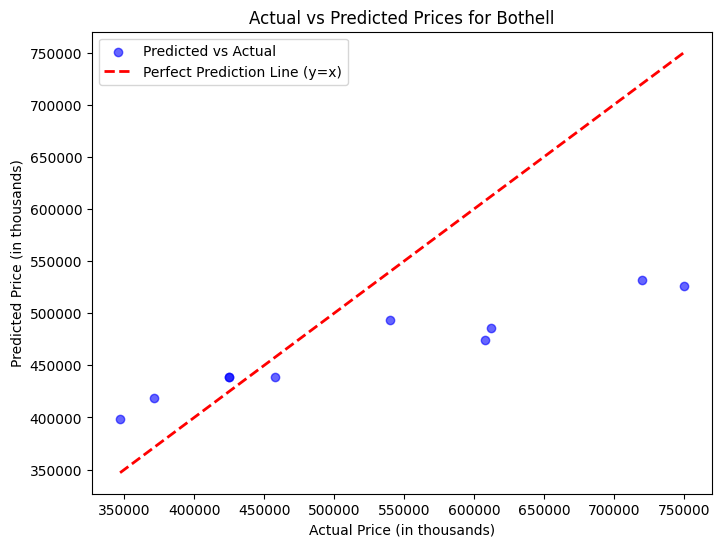

Model trained for Burien


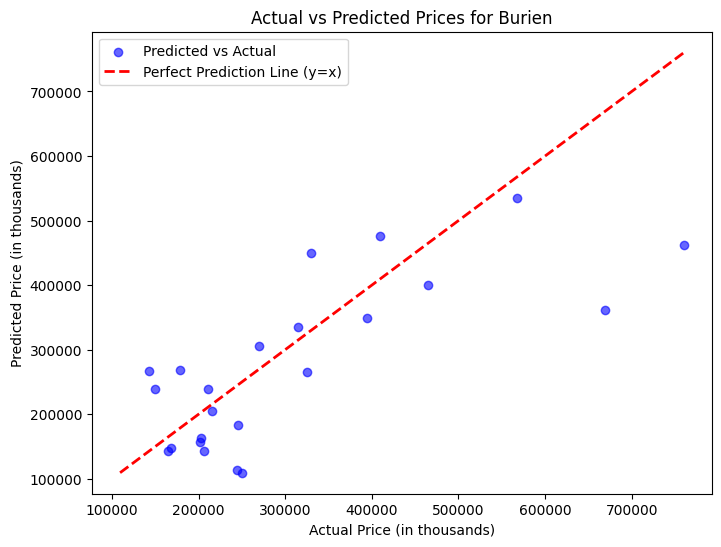

Model trained for Carnation


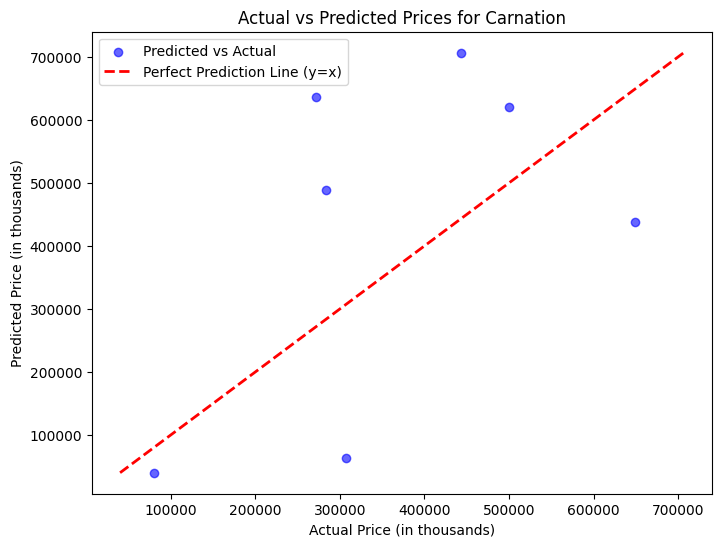

Not enough data to train model for Clyde Hill
Model trained for Covington


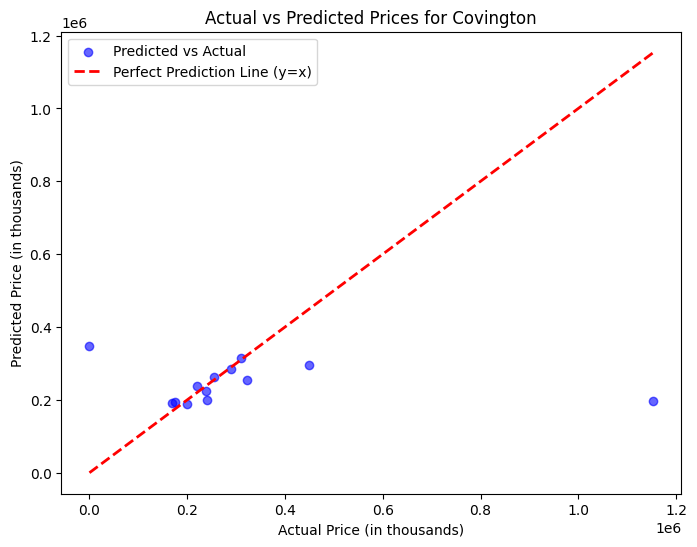

Model trained for Des Moines


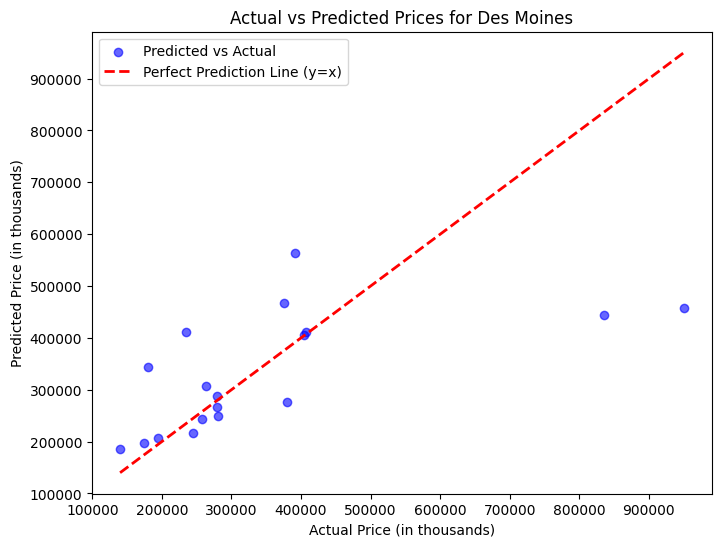

Model trained for Duvall


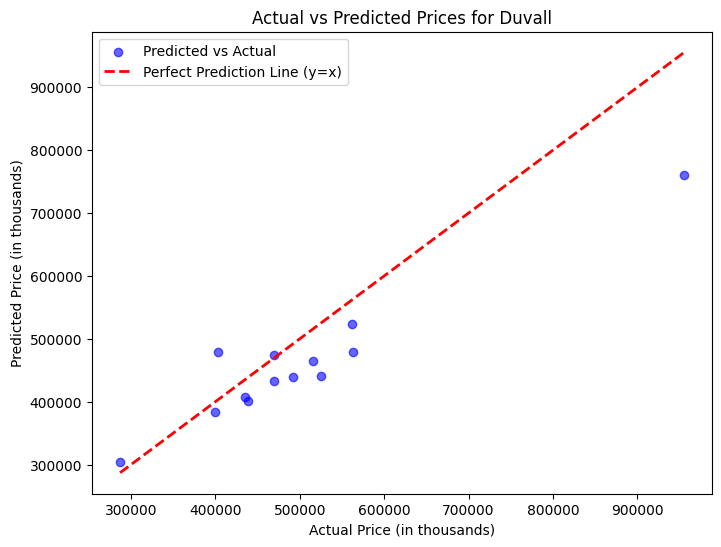

Model trained for Enumclaw


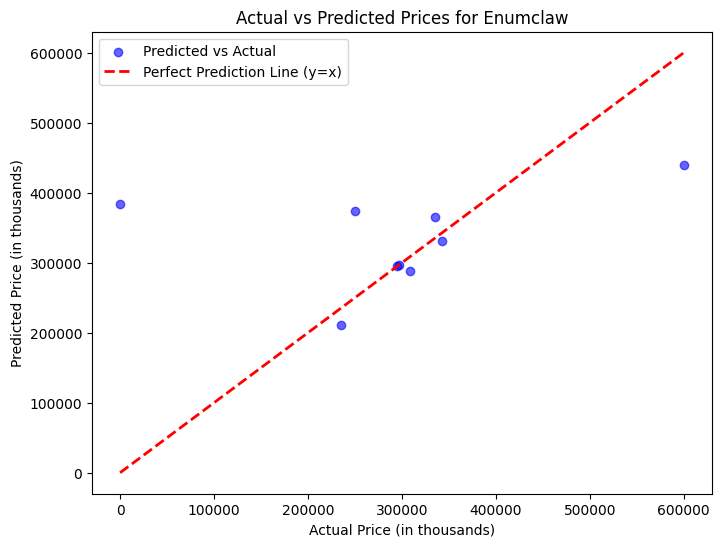

Not enough data to train model for Fall City
Model trained for Federal Way


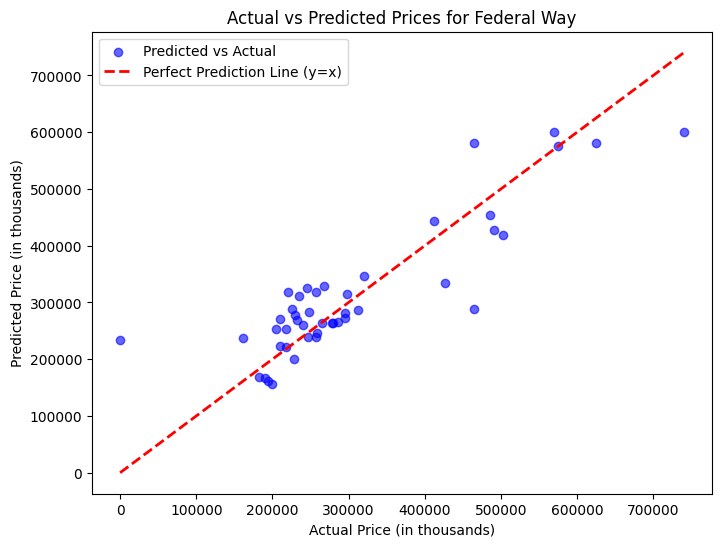

Not enough data to train model for Inglewood-Finn Hill
Model trained for Issaquah


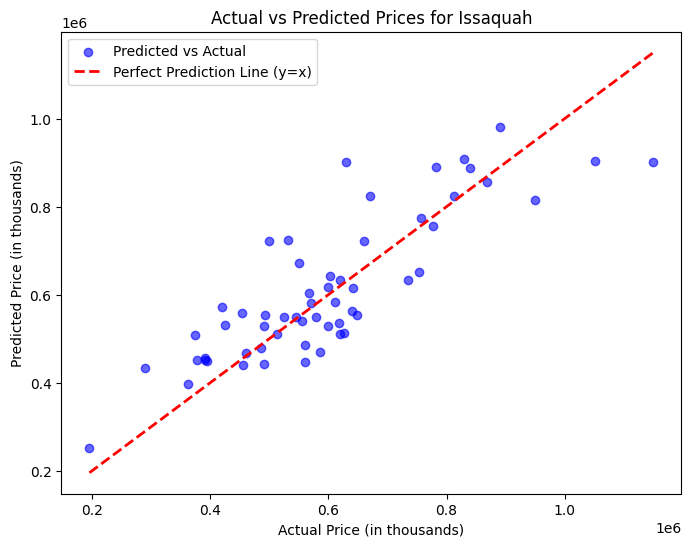

Model trained for Kenmore


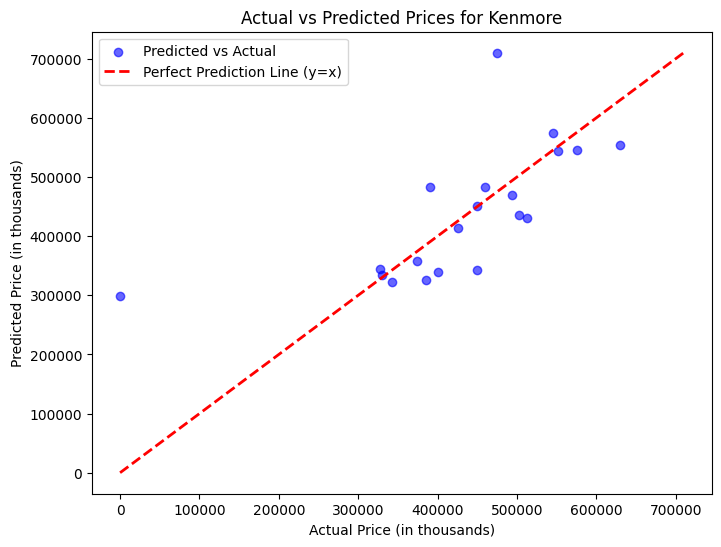

Model trained for Kent


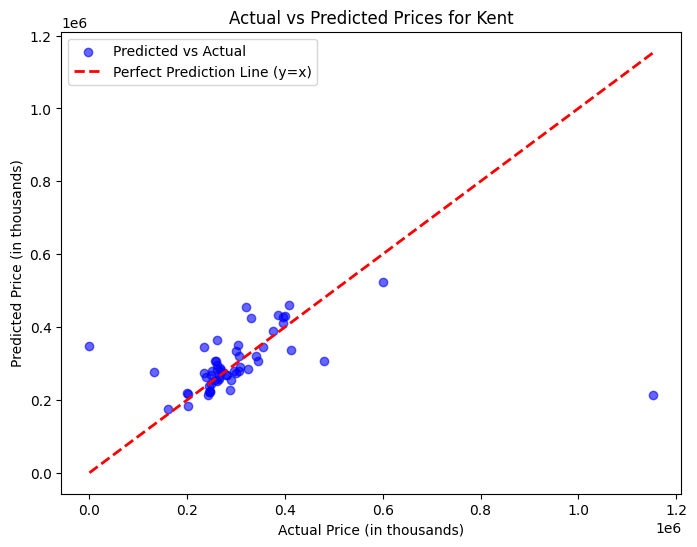

Model trained for Kirkland


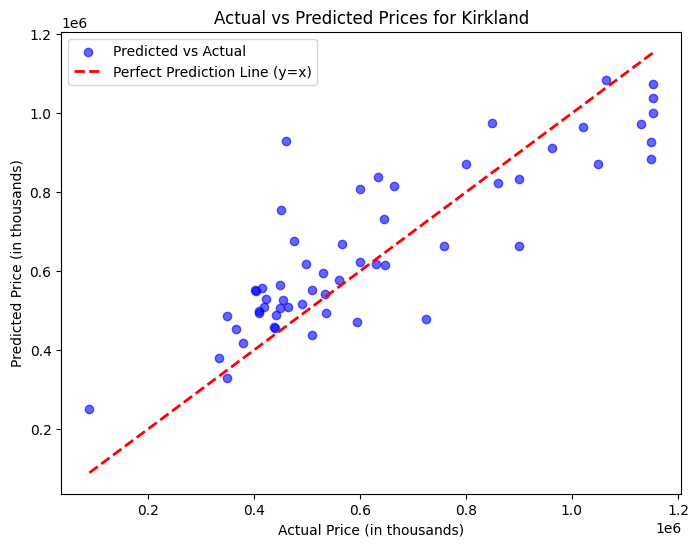

Model trained for Lake Forest Park


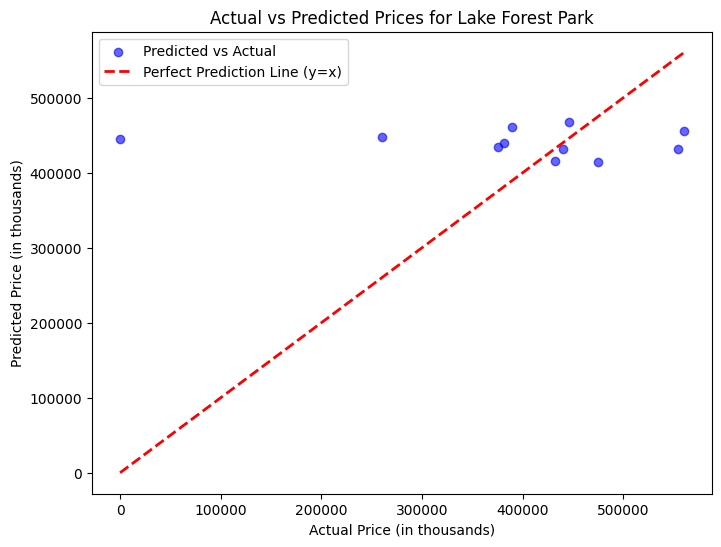

Model trained for Maple Valley


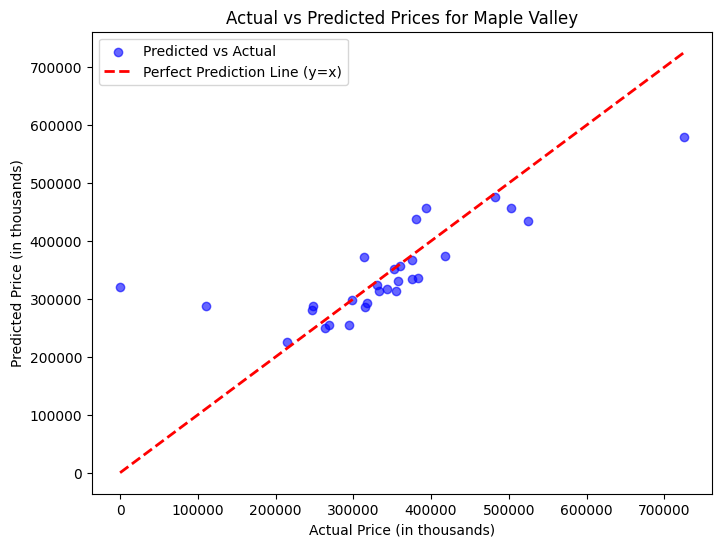

Not enough data to train model for Medina
Model trained for Mercer Island


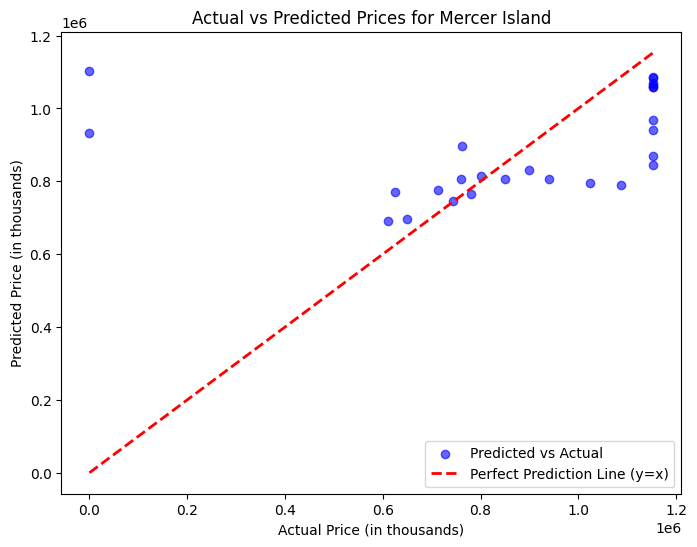

Not enough data to train model for Milton
Model trained for Newcastle


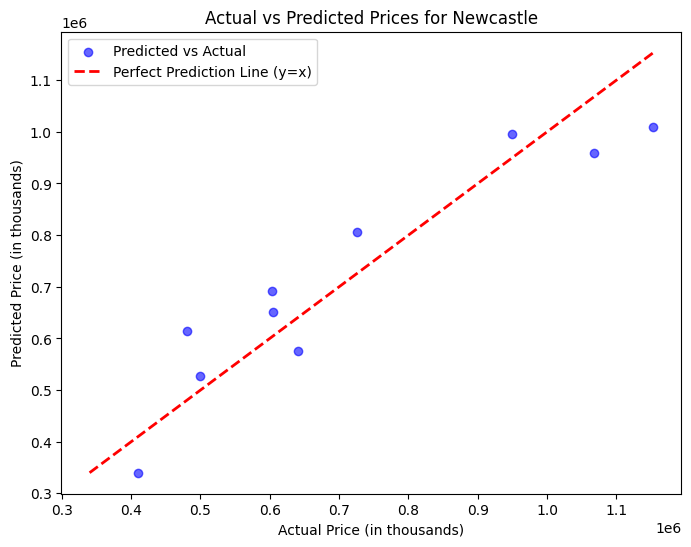

Not enough data to train model for Normandy Park
Model trained for North Bend


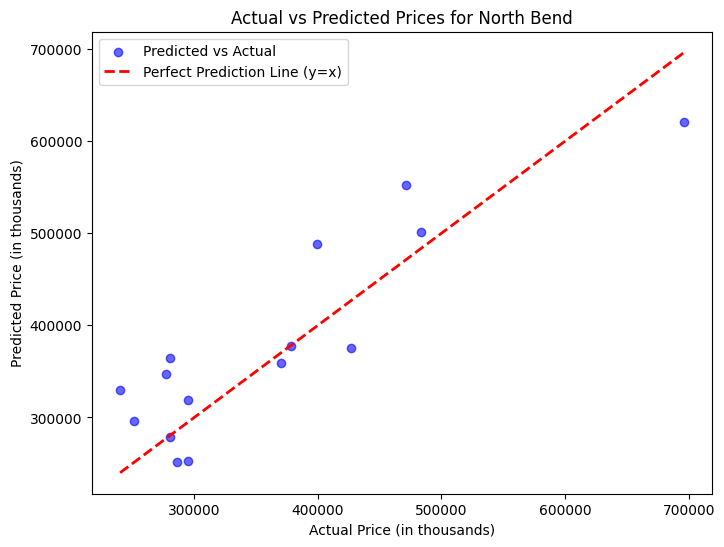

Not enough data to train model for Pacific
Not enough data to train model for Preston
Not enough data to train model for Ravensdale
Model trained for Redmond


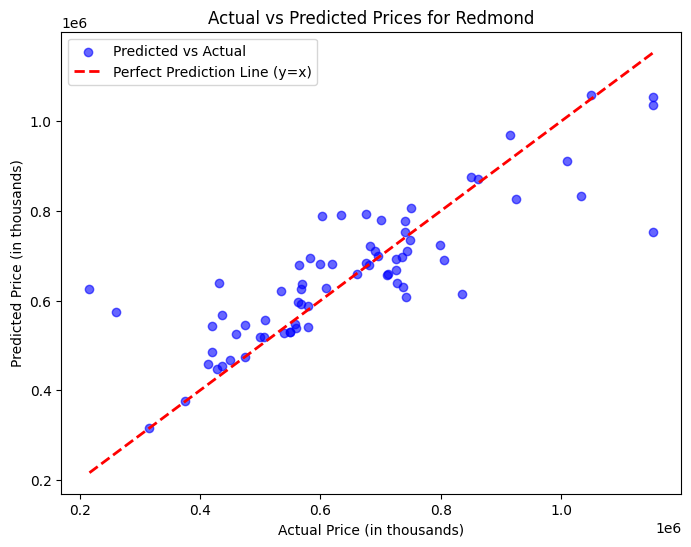

Model trained for Renton


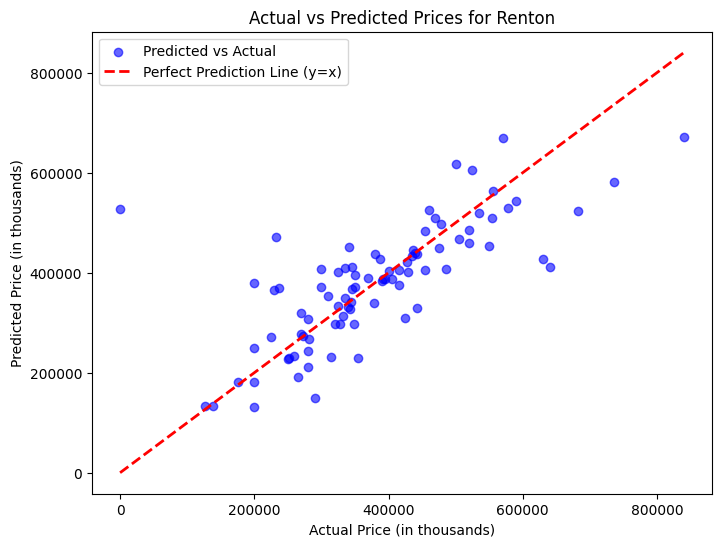

Model trained for Sammamish


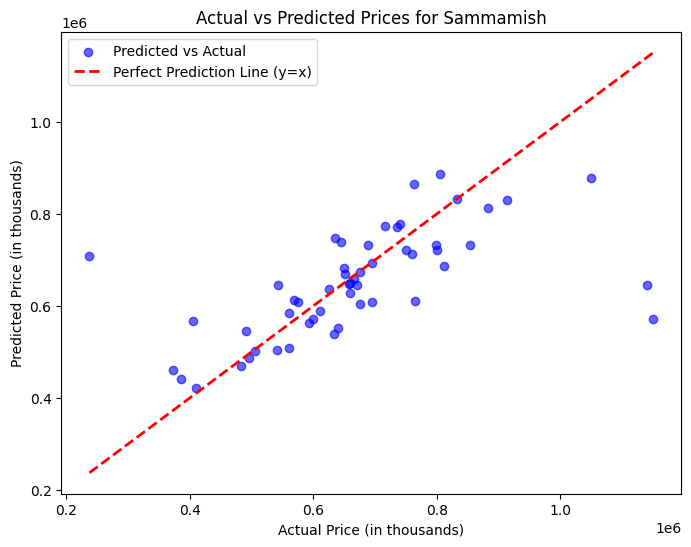

Model trained for SeaTac


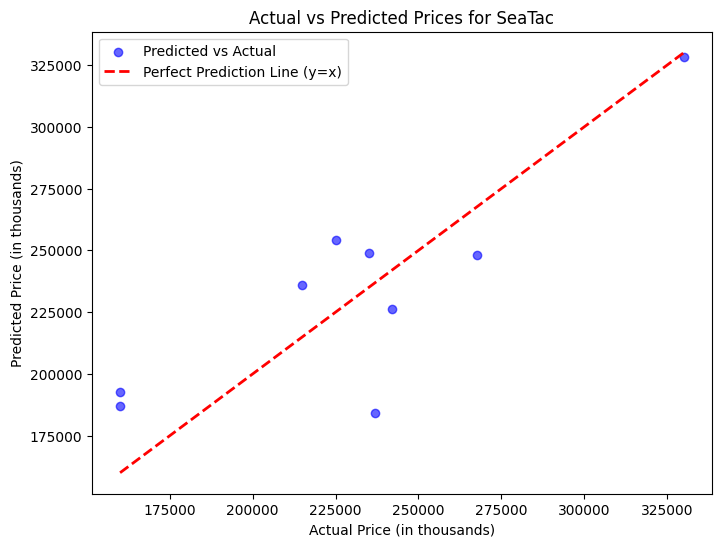

Model trained for Seattle


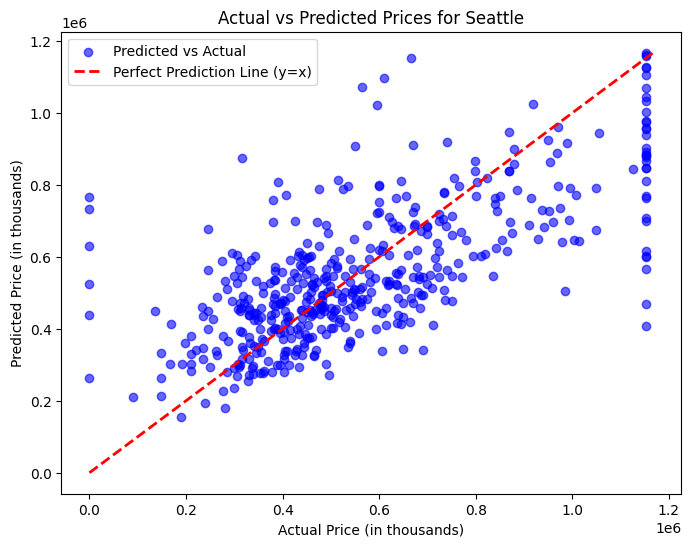

Model trained for Shoreline


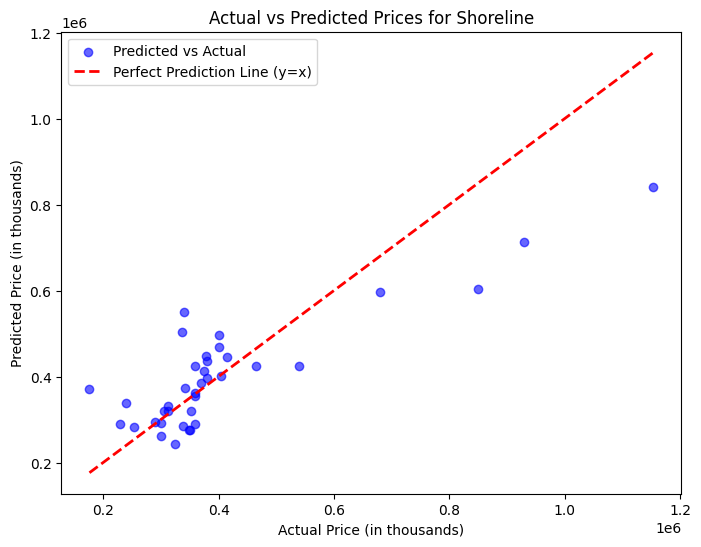

Not enough data to train model for Skykomish
Model trained for Snoqualmie


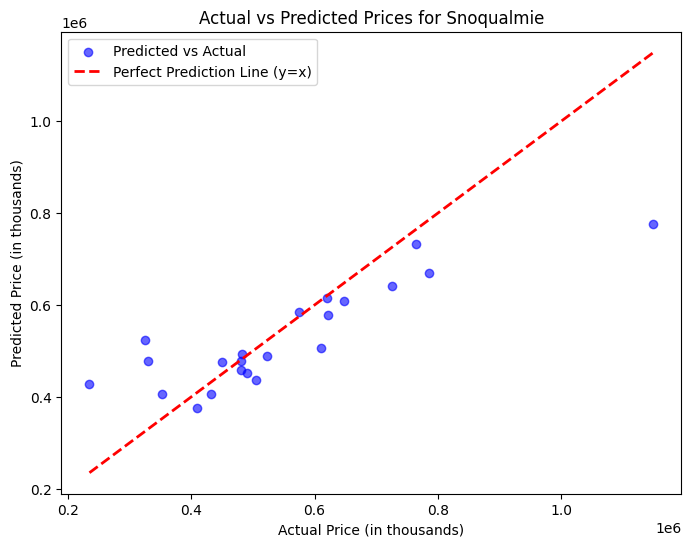

Not enough data to train model for Snoqualmie Pass
Model trained for Tukwila


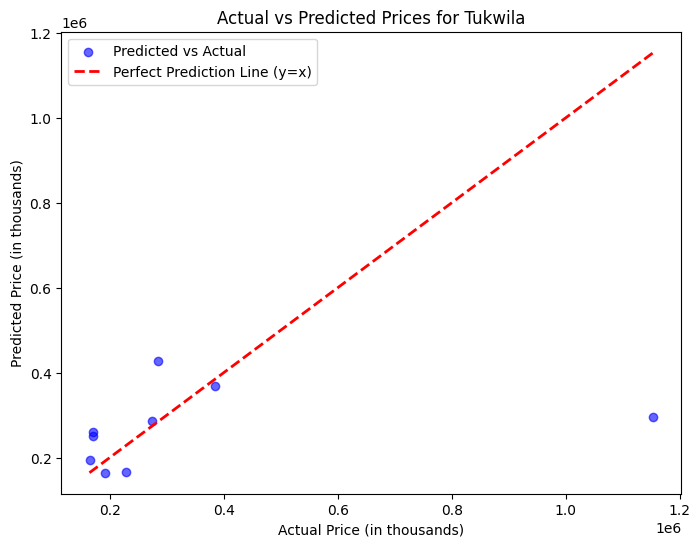

Model trained for Vashon


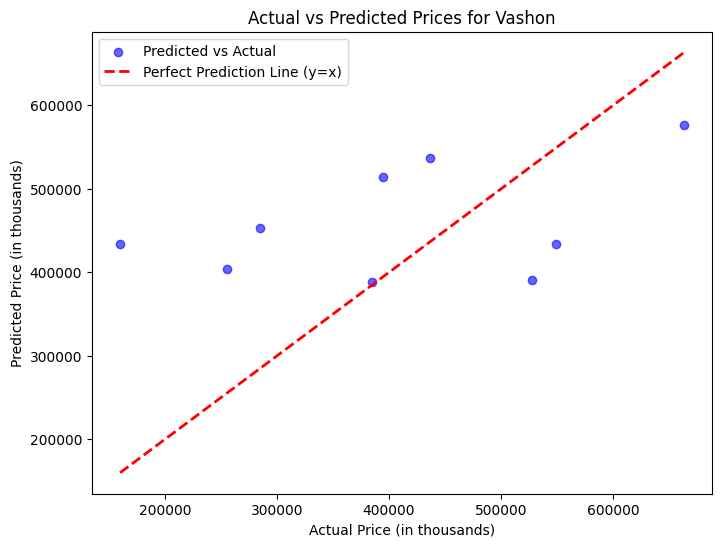

Model trained for Woodinville


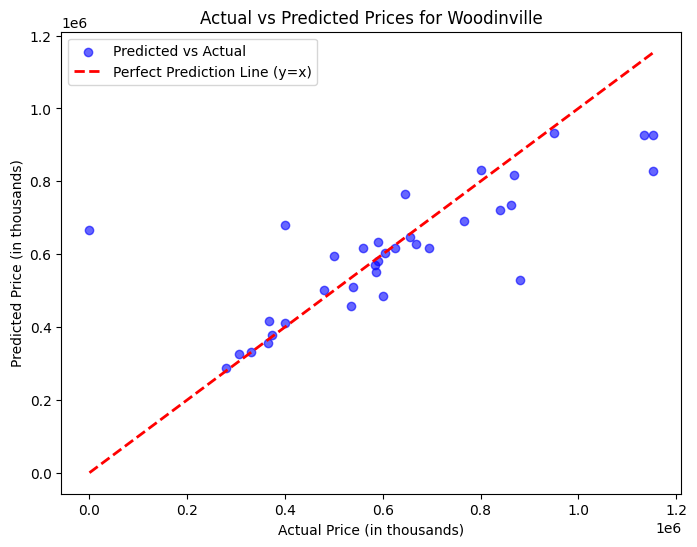

Not enough data to train model for Yarrow Point


In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

models = {}

for city, city_data in data.groupby('city'):
    if len(city_data) > 20:  # Check if there are enough samples
        X = city_data[["sqft_living", "bathrooms", "sqft_lot"]]
        y = city_data["price"]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        models[city] = model
        print(f"Model trained for {city}")

        # Scatter plot: Actual vs Predicted Prices
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

        # Add a reference diagonal line (perfect prediction line)
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed', linewidth=2, label="Perfect Prediction Line (y=x)")

        # Labels and title
        plt.xlabel("Actual Price (in thousands)")
        plt.ylabel("Predicted Price (in thousands)")
        plt.title(f"Actual vs Predicted Prices for {city}")
        plt.legend()
        plt.show()
    else:
        print(f"Not enough data to train model for {city}")


Random Forest model trained for Algona
Algona - Mean Absolute Error: 24990.00, RMSE: 25161.18


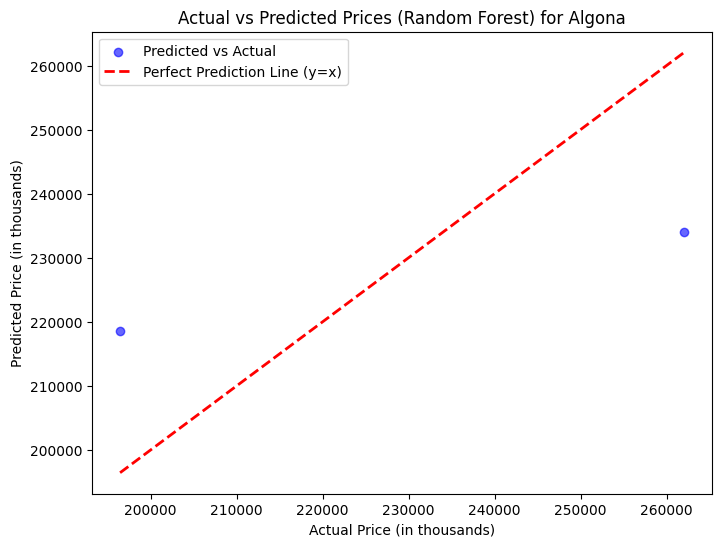

Random Forest model trained for Auburn
Auburn - Mean Absolute Error: 61127.73, RMSE: 84820.37


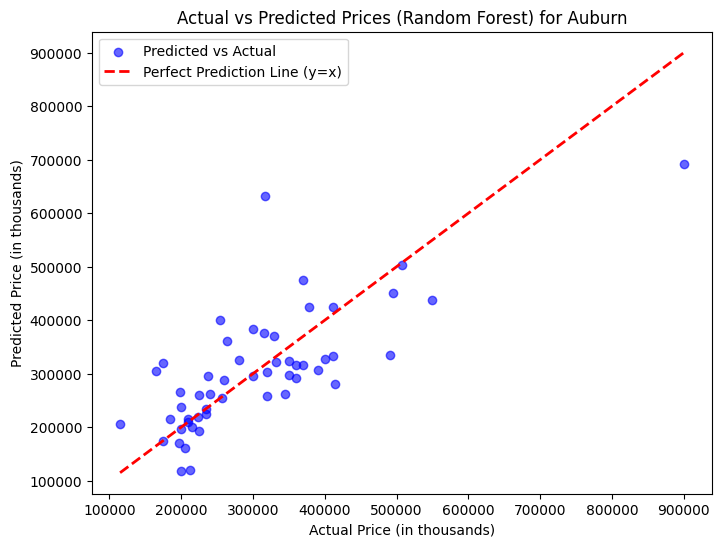

Not enough data to train model for Beaux Arts Village
Random Forest model trained for Bellevue
Bellevue - Mean Absolute Error: 149496.46, RMSE: 211333.85


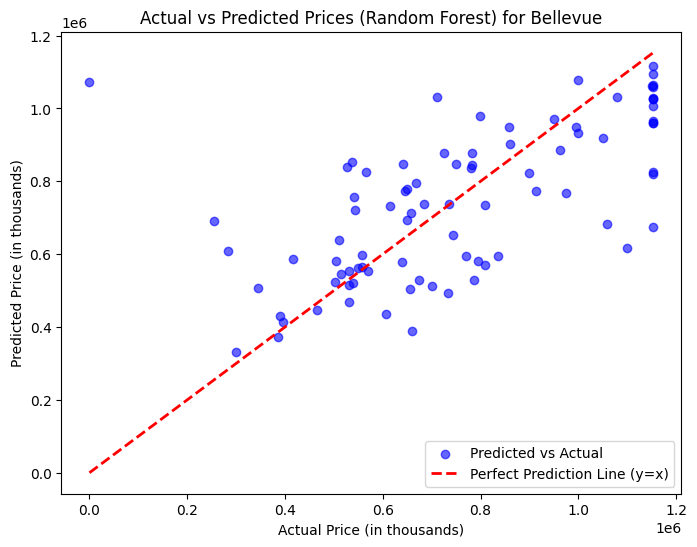

Random Forest model trained for Black Diamond
Black Diamond - Mean Absolute Error: 109650.00, RMSE: 143388.12


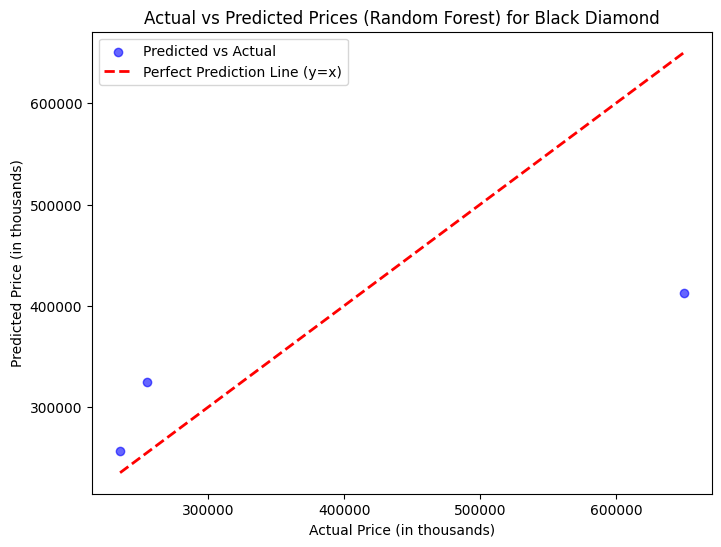

Random Forest model trained for Bothell
Bothell - Mean Absolute Error: 85313.43, RMSE: 124519.80


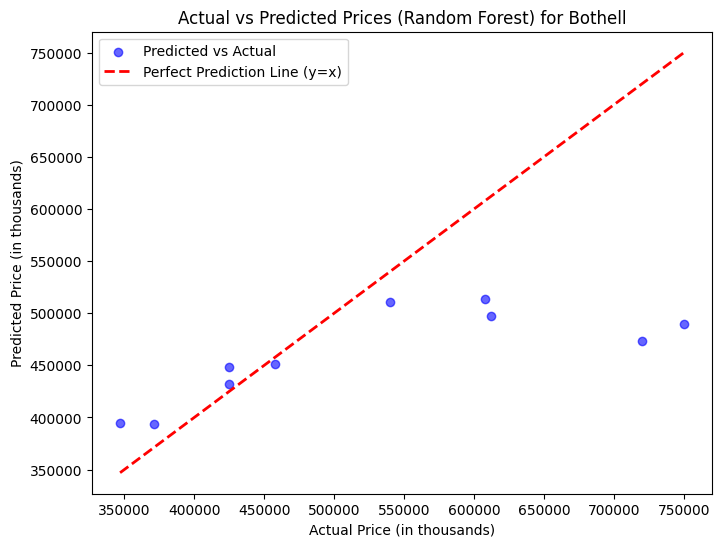

Random Forest model trained for Burien
Burien - Mean Absolute Error: 72360.09, RMSE: 104127.82


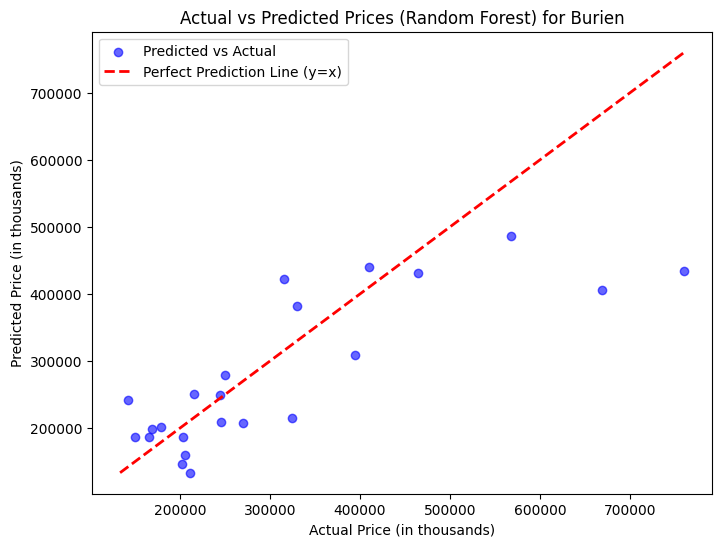

Random Forest model trained for Carnation
Carnation - Mean Absolute Error: 128836.66, RMSE: 149719.36


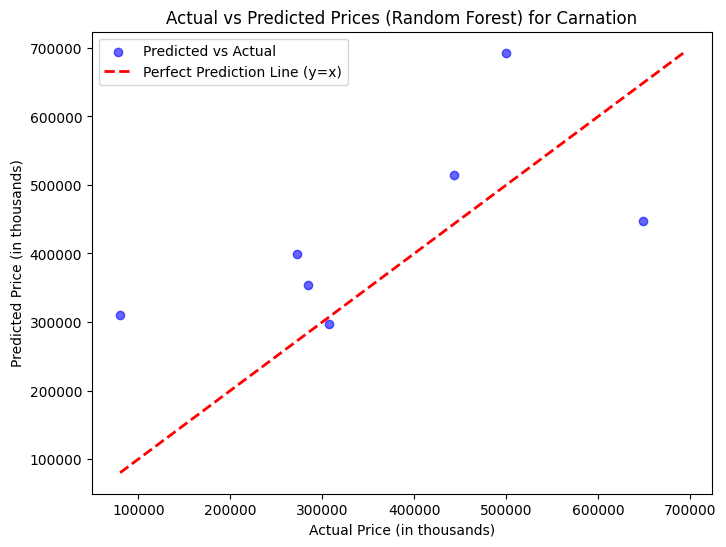

Random Forest model trained for Clyde Hill
Clyde Hill - Mean Absolute Error: 573171.95, RMSE: 751189.18


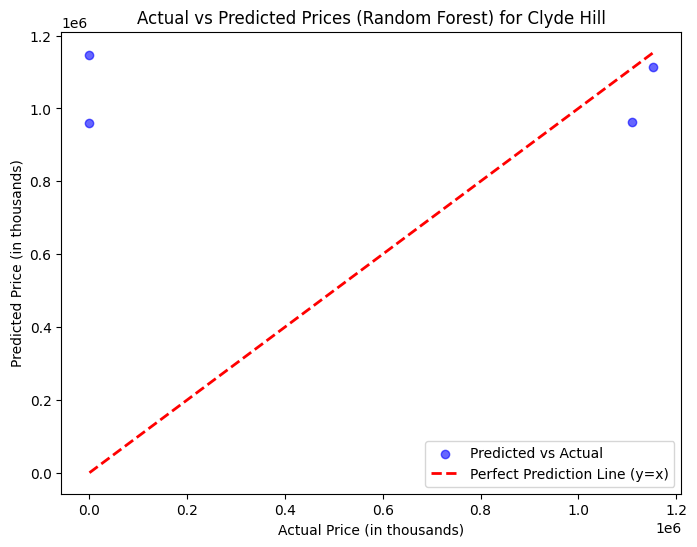

Random Forest model trained for Covington
Covington - Mean Absolute Error: 136051.29, RMSE: 292308.85


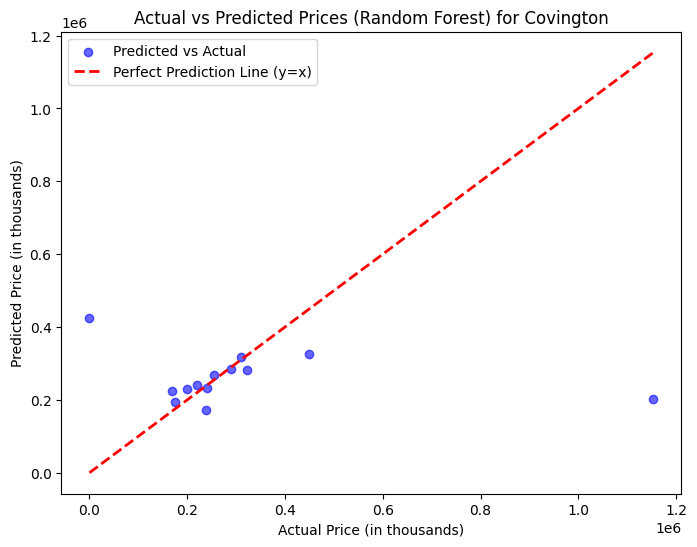

Random Forest model trained for Des Moines
Des Moines - Mean Absolute Error: 101110.89, RMSE: 137740.17


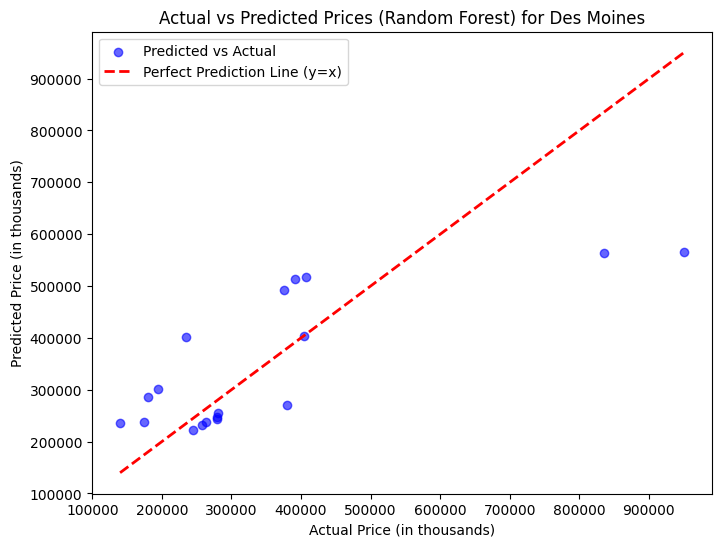

Random Forest model trained for Duvall
Duvall - Mean Absolute Error: 88094.28, RMSE: 143743.33


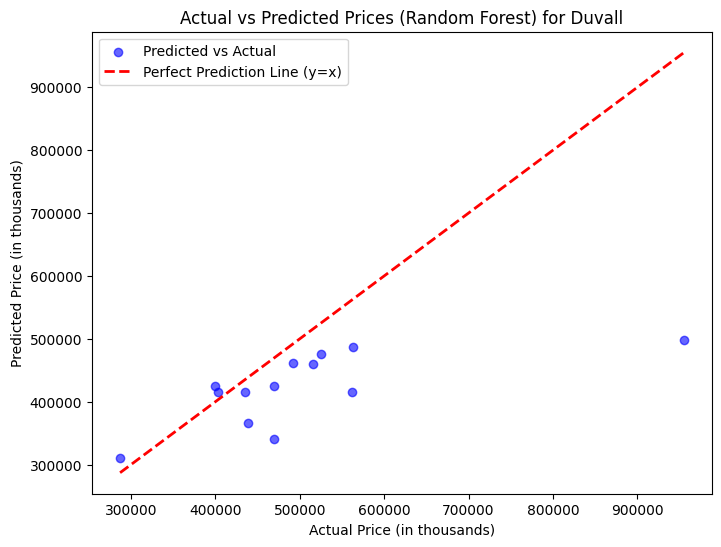

Random Forest model trained for Enumclaw
Enumclaw - Mean Absolute Error: 92152.24, RMSE: 145592.06


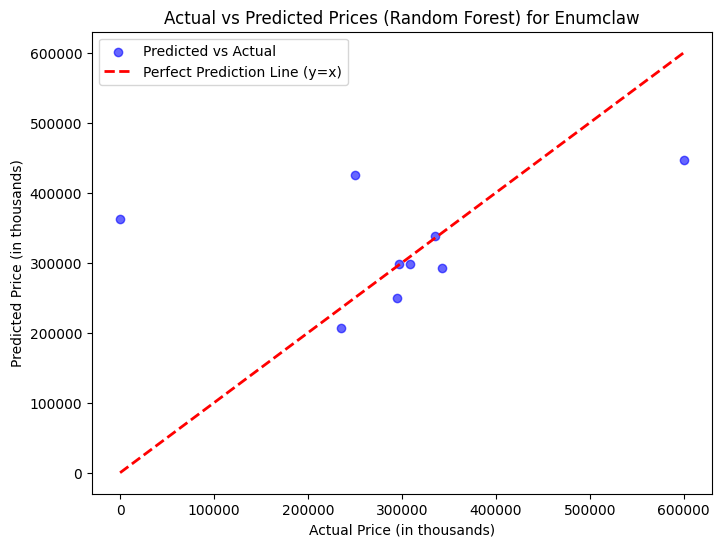

Random Forest model trained for Fall City
Fall City - Mean Absolute Error: 103308.52, RMSE: 106149.62


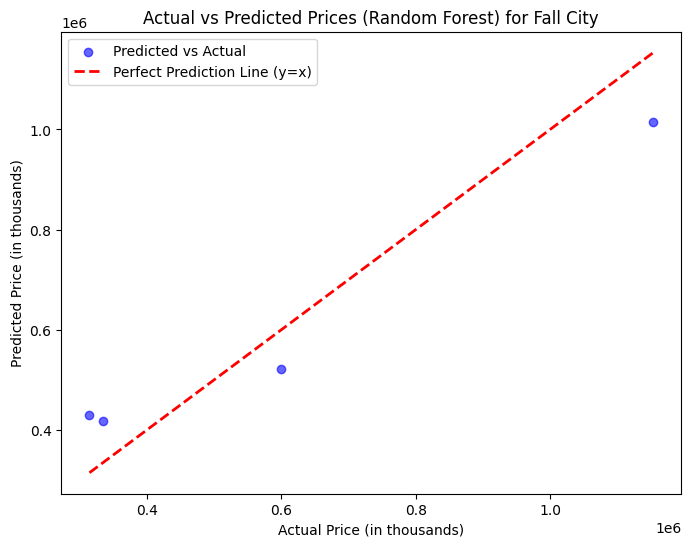

Random Forest model trained for Federal Way
Federal Way - Mean Absolute Error: 51794.43, RMSE: 73727.05


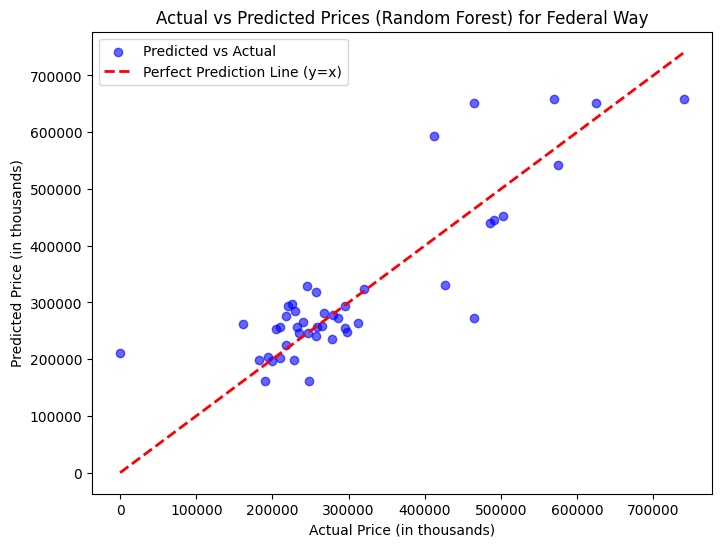

Not enough data to train model for Inglewood-Finn Hill
Random Forest model trained for Issaquah
Issaquah - Mean Absolute Error: 89080.80, RMSE: 122653.44


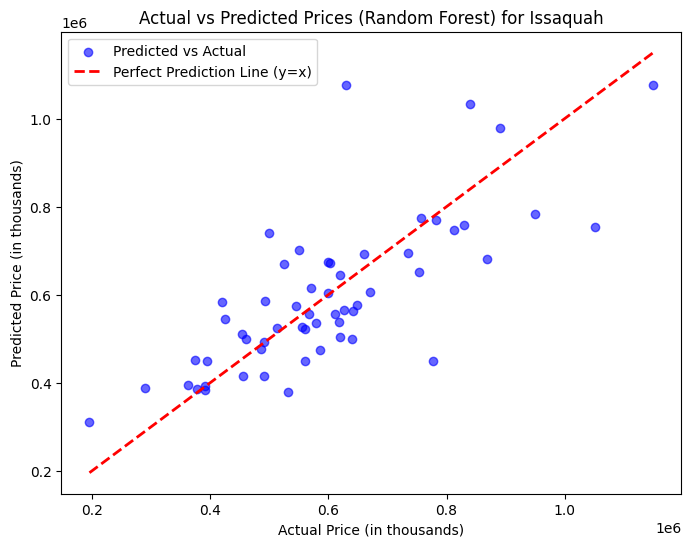

Random Forest model trained for Kenmore
Kenmore - Mean Absolute Error: 58597.00, RMSE: 92766.84


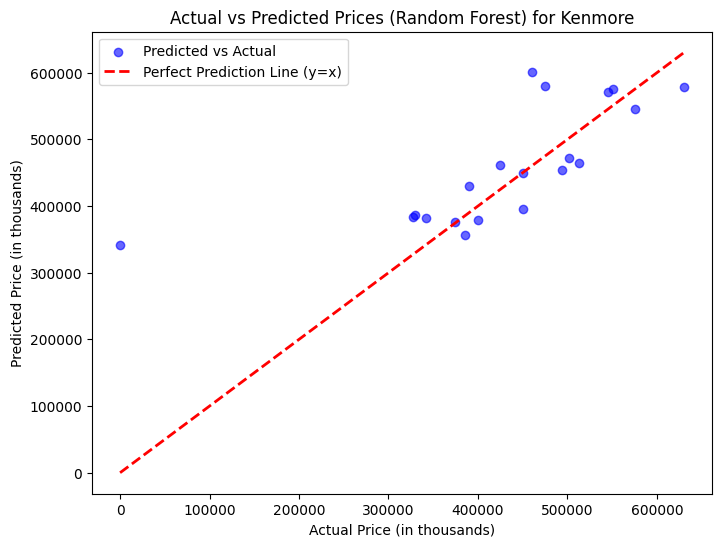

Random Forest model trained for Kent
Kent - Mean Absolute Error: 60485.91, RMSE: 140868.86


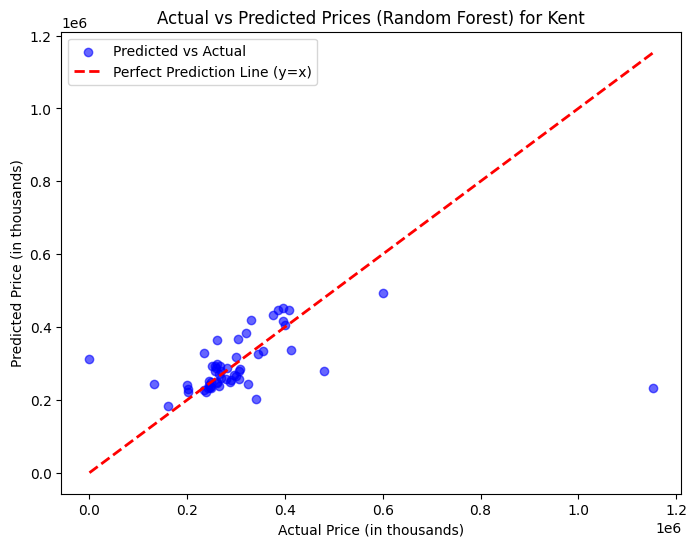

Random Forest model trained for Kirkland
Kirkland - Mean Absolute Error: 107492.44, RMSE: 142849.78


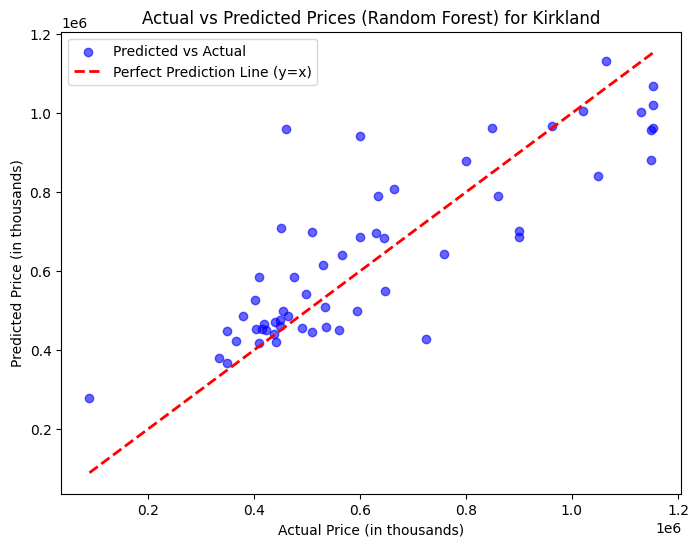

Random Forest model trained for Lake Forest Park
Lake Forest Park - Mean Absolute Error: 117705.45, RMSE: 197029.98


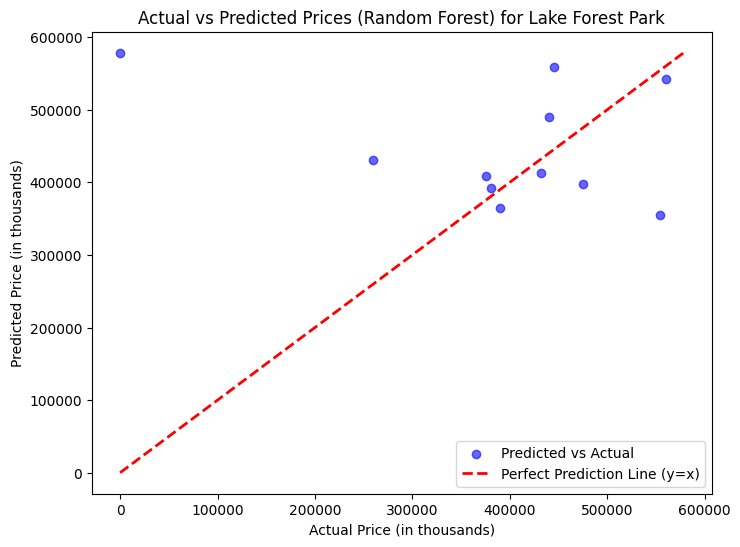

Random Forest model trained for Maple Valley
Maple Valley - Mean Absolute Error: 52810.20, RMSE: 82465.11


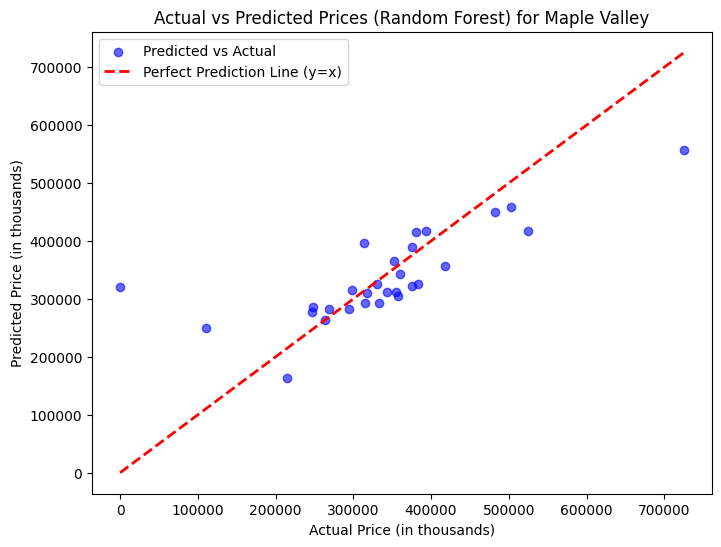

Random Forest model trained for Medina
Medina - Mean Absolute Error: 241273.44, RMSE: 482546.88


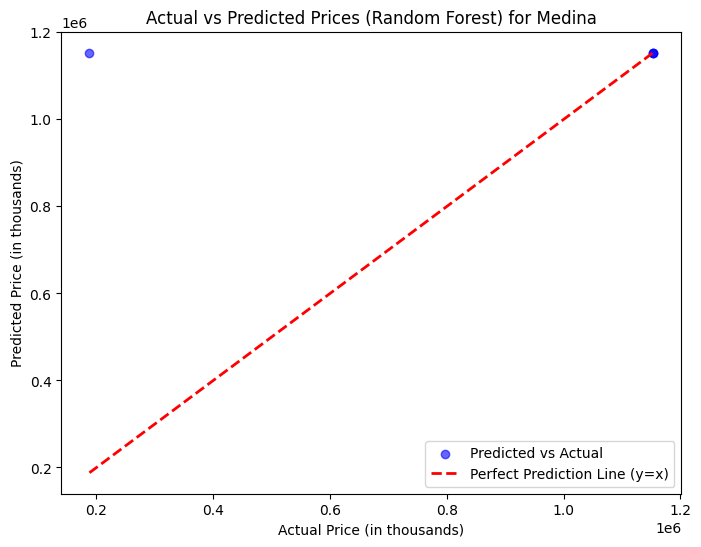

Random Forest model trained for Mercer Island
Mercer Island - Mean Absolute Error: 209137.65, RMSE: 336270.02


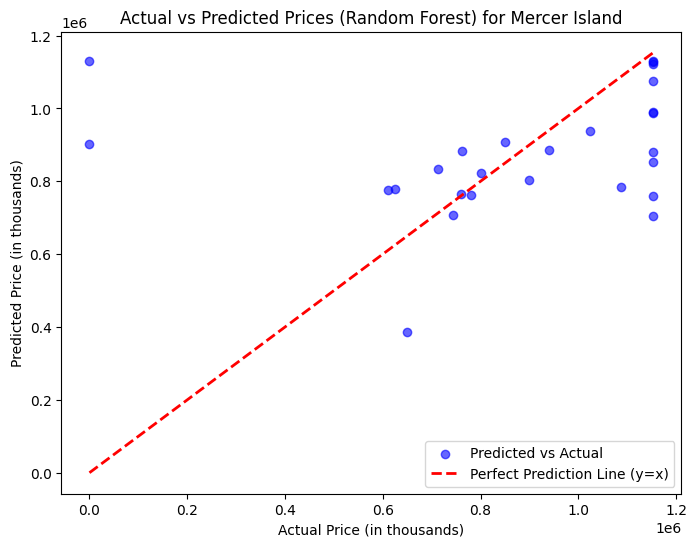

Random Forest model trained for Milton
Milton - Mean Absolute Error: 70000.00, RMSE: 70000.00


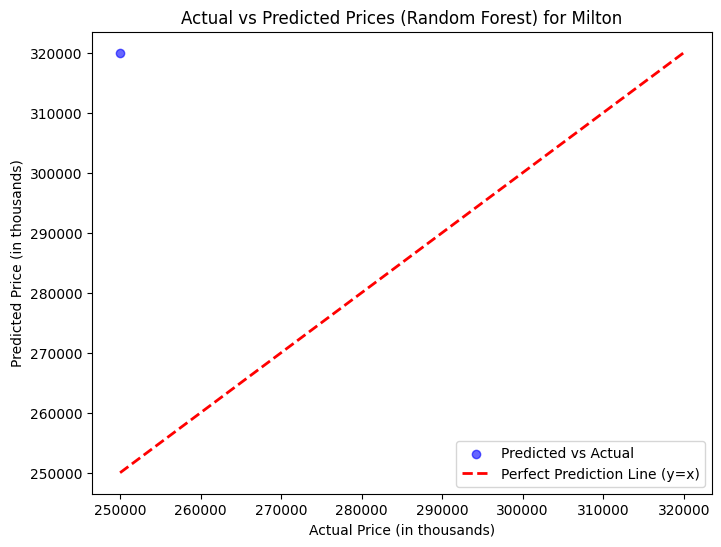

Random Forest model trained for Newcastle
Newcastle - Mean Absolute Error: 82468.29, RMSE: 96821.04


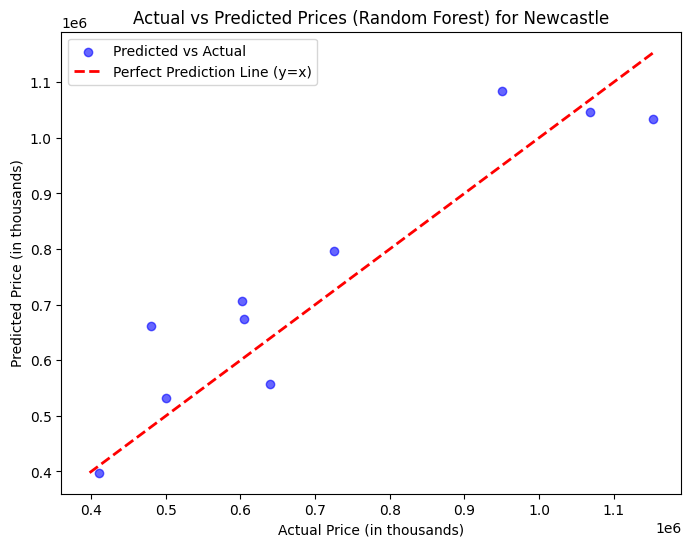

Random Forest model trained for Normandy Park
Normandy Park - Mean Absolute Error: 163698.71, RMSE: 246799.04


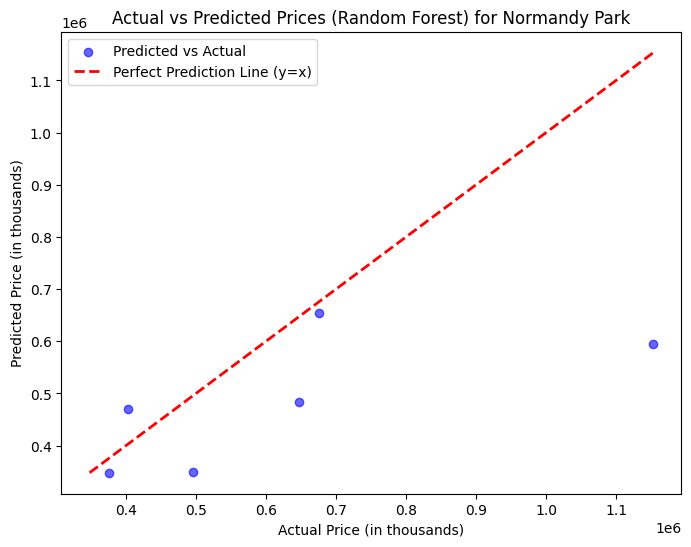

Random Forest model trained for North Bend
North Bend - Mean Absolute Error: 50006.61, RMSE: 63673.20


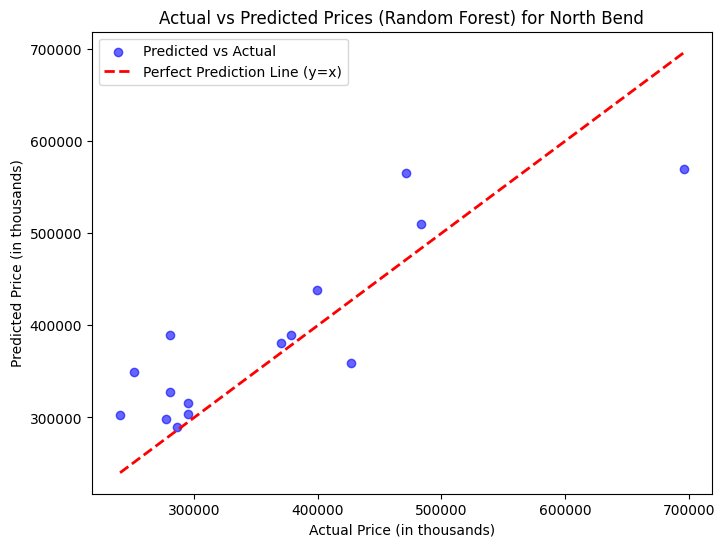

Random Forest model trained for Pacific
Pacific - Mean Absolute Error: 23566.00, RMSE: 23570.18


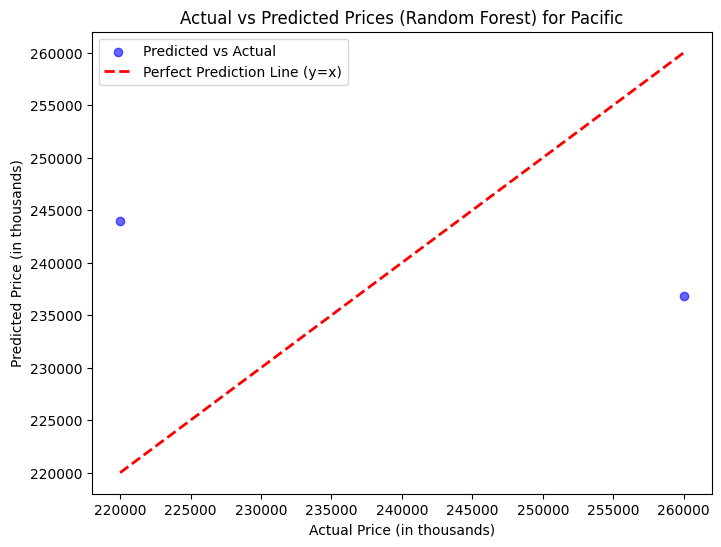

Random Forest model trained for Preston
Preston - Mean Absolute Error: 245100.00, RMSE: 245100.00


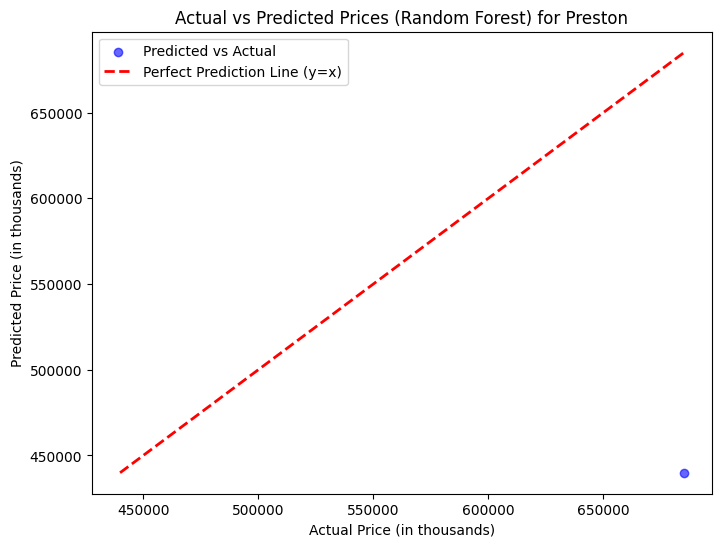

Random Forest model trained for Ravensdale
Ravensdale - Mean Absolute Error: 155511.67, RMSE: 181952.34


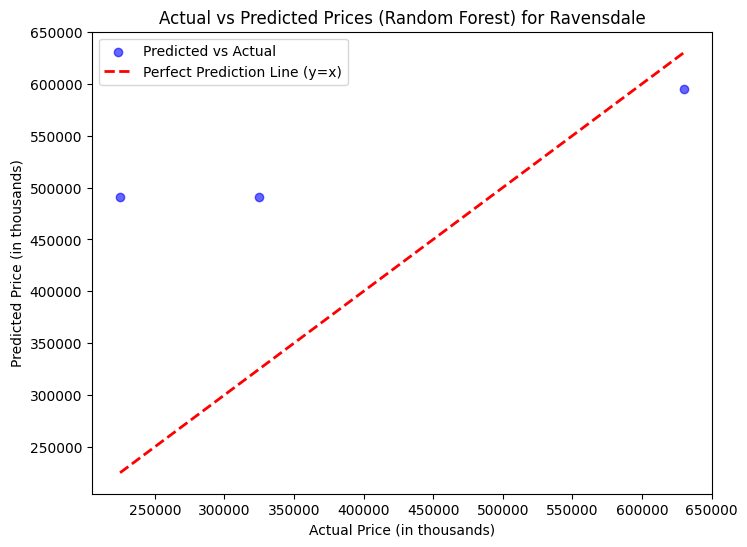

Random Forest model trained for Redmond
Redmond - Mean Absolute Error: 80966.10, RMSE: 118713.81


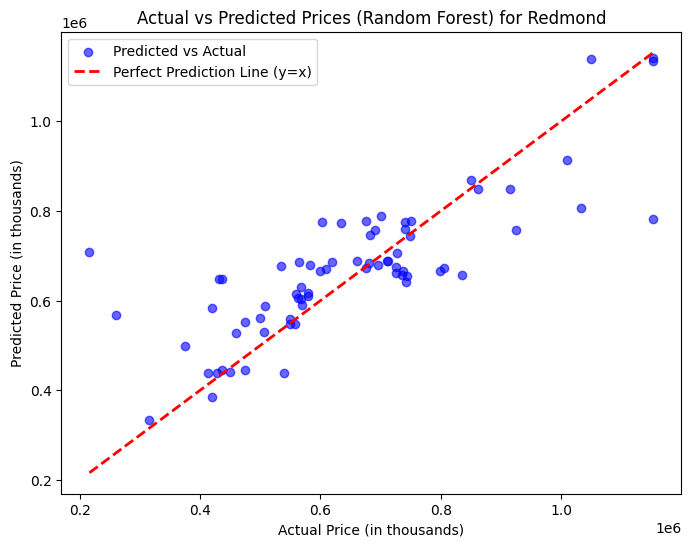

Random Forest model trained for Renton
Renton - Mean Absolute Error: 72333.48, RMSE: 111073.05


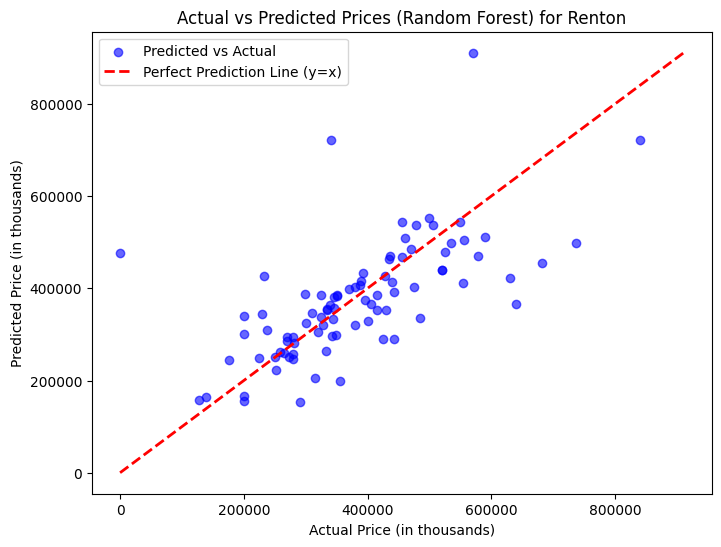

Random Forest model trained for Sammamish
Sammamish - Mean Absolute Error: 88509.62, RMSE: 153090.22


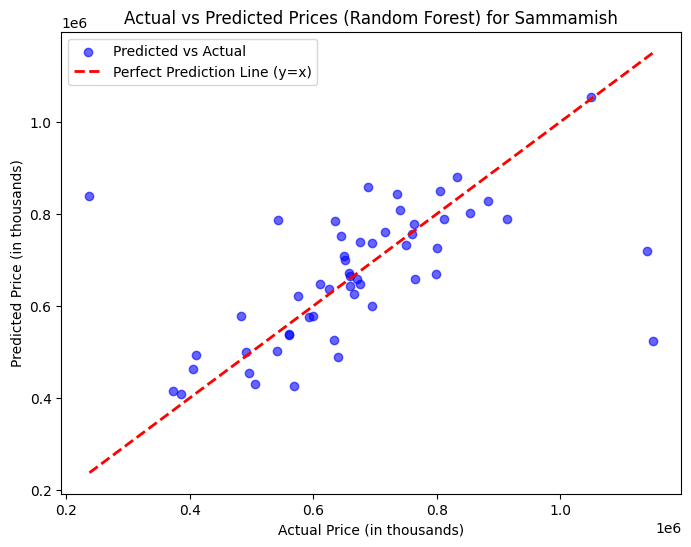

Random Forest model trained for SeaTac
SeaTac - Mean Absolute Error: 18746.66, RMSE: 30754.69


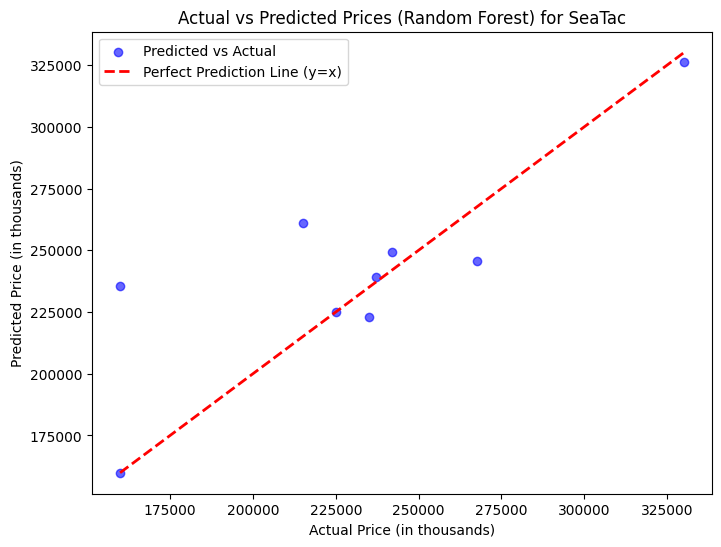

Random Forest model trained for Seattle
Seattle - Mean Absolute Error: 146818.12, RMSE: 195947.28


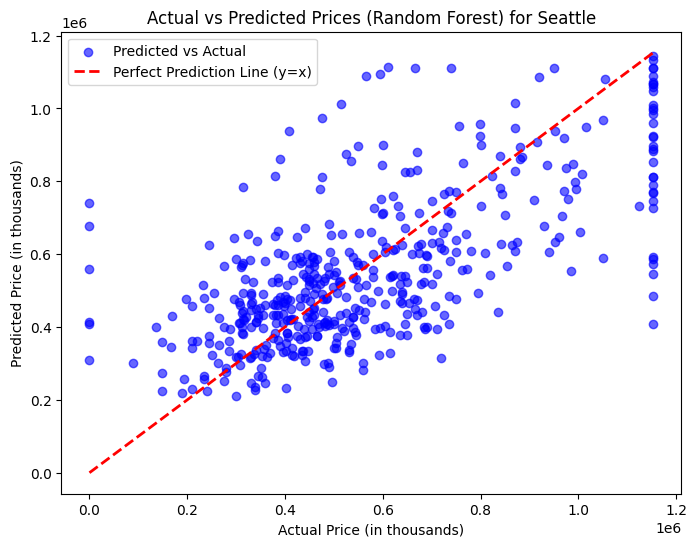

Random Forest model trained for Shoreline
Shoreline - Mean Absolute Error: 65415.84, RMSE: 90657.11


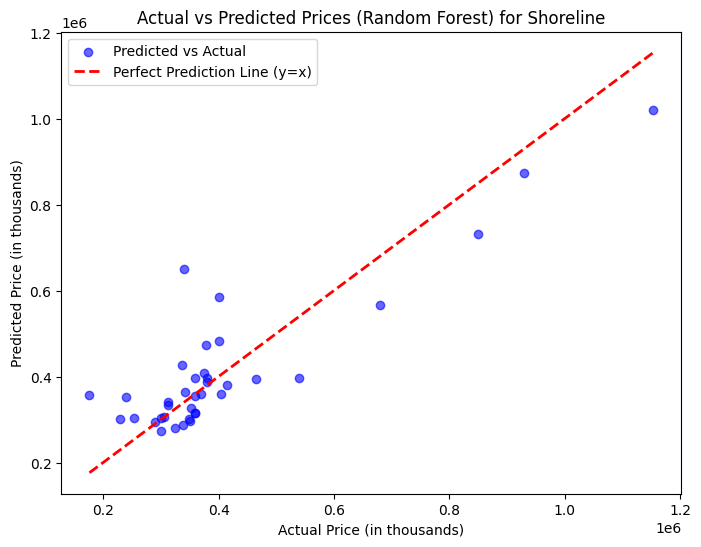

Random Forest model trained for Skykomish
Skykomish - Mean Absolute Error: 84900.00, RMSE: 84900.00


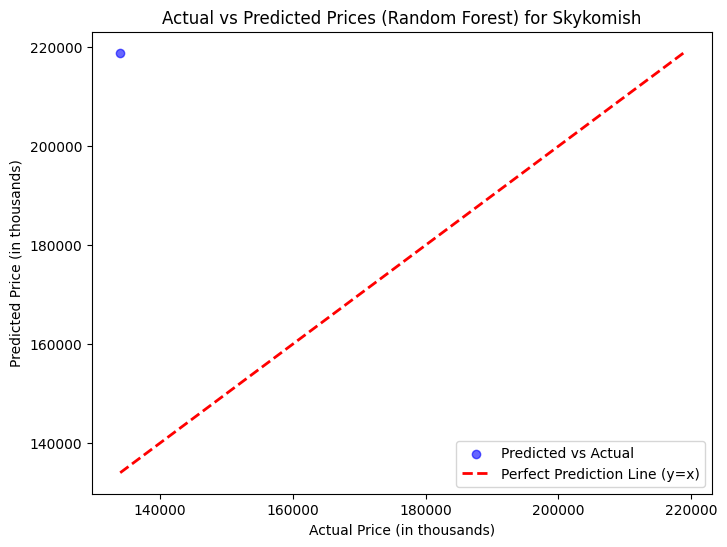

Random Forest model trained for Snoqualmie
Snoqualmie - Mean Absolute Error: 62392.45, RMSE: 106048.93


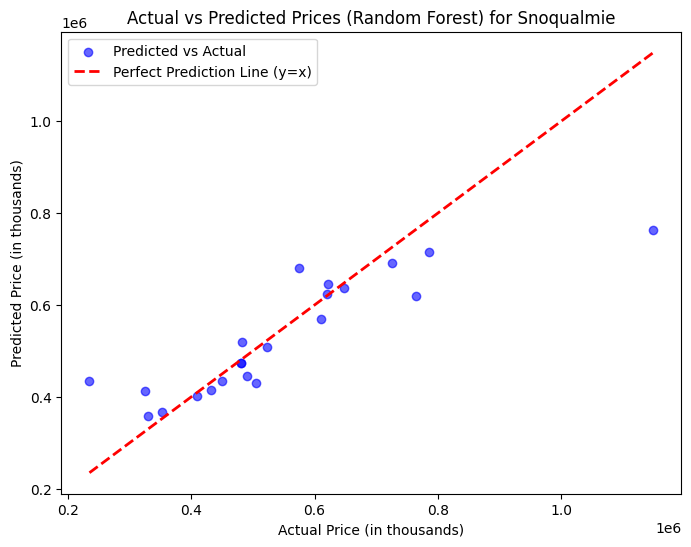

Not enough data to train model for Snoqualmie Pass
Random Forest model trained for Tukwila
Tukwila - Mean Absolute Error: 152373.53, RMSE: 303482.83


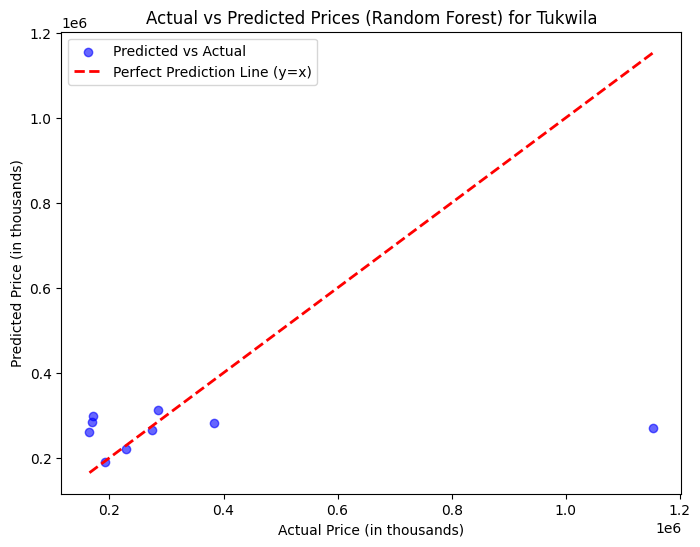

Random Forest model trained for Vashon
Vashon - Mean Absolute Error: 123959.67, RMSE: 141522.01


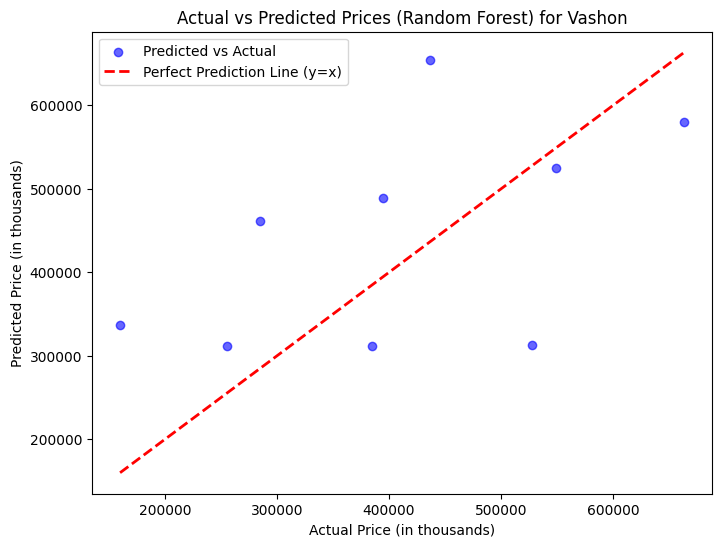

Random Forest model trained for Woodinville
Woodinville - Mean Absolute Error: 112251.89, RMSE: 182884.82


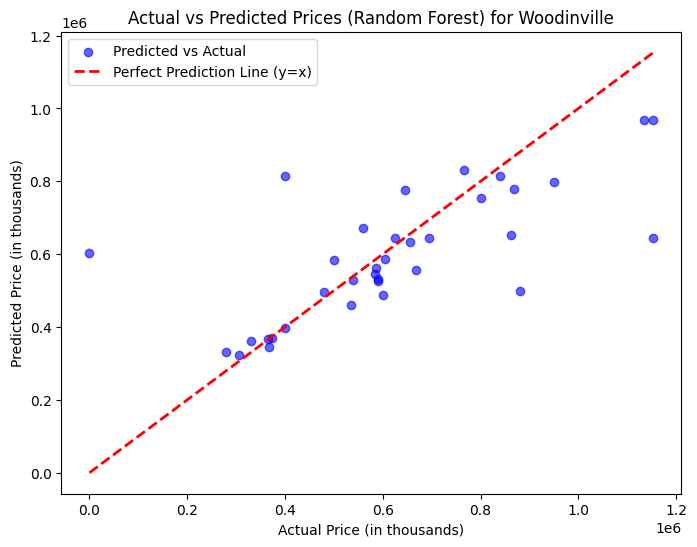

Random Forest model trained for Yarrow Point
Yarrow Point - Mean Absolute Error: 534371.88, RMSE: 717278.22


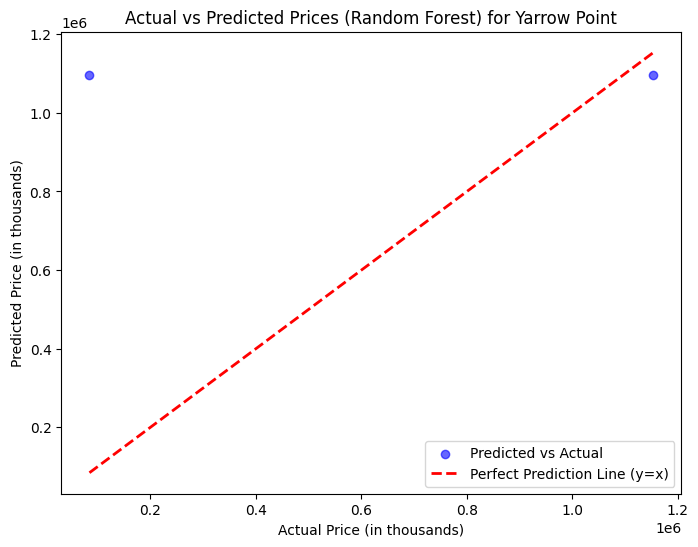

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {}

for city, city_data in data.groupby('city'):
    if len(city_data) > 1:  # Ensure enough data points
        X = city_data[["sqft_living", "bathrooms", "sqft_lot"]]
        y = city_data["price"]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train Random Forest model
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        models[city] = model
        print(f"Random Forest model trained for {city}")

        # Calculate errors
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{city} - Mean Absolute Error: {mae:.2f}, RMSE: {rmse:.2f}")

        # Scatter plot: Actual vs Predicted Prices
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

        # Perfect prediction line
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed', linewidth=2, label="Perfect Prediction Line (y=x)")

        # Labels and title
        plt.xlabel("Actual Price (in thousands)")
        plt.ylabel("Predicted Price (in thousands)")
        plt.title(f"Actual vs Predicted Prices (Random Forest) for {city}")
        plt.legend()
        plt.show()
    else:
        print(f"Not enough data to train model for {city}")
